In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
bank_df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSz3Yx52trZcGRODnR1-aMr8bTTKZDGsZbJj1kw5ms_H5ZOypBXNd2Hyx1bn1A8sznMTQOtCUniEnvJ/pub?output=csv")

# ABANDONO DE CLIENTES EN TARJETAS DE CRÉDITO


**Integrante:**
- Alejandro Gutierrez 
- Lourdes Rojos
- Juan Pablo Manzano

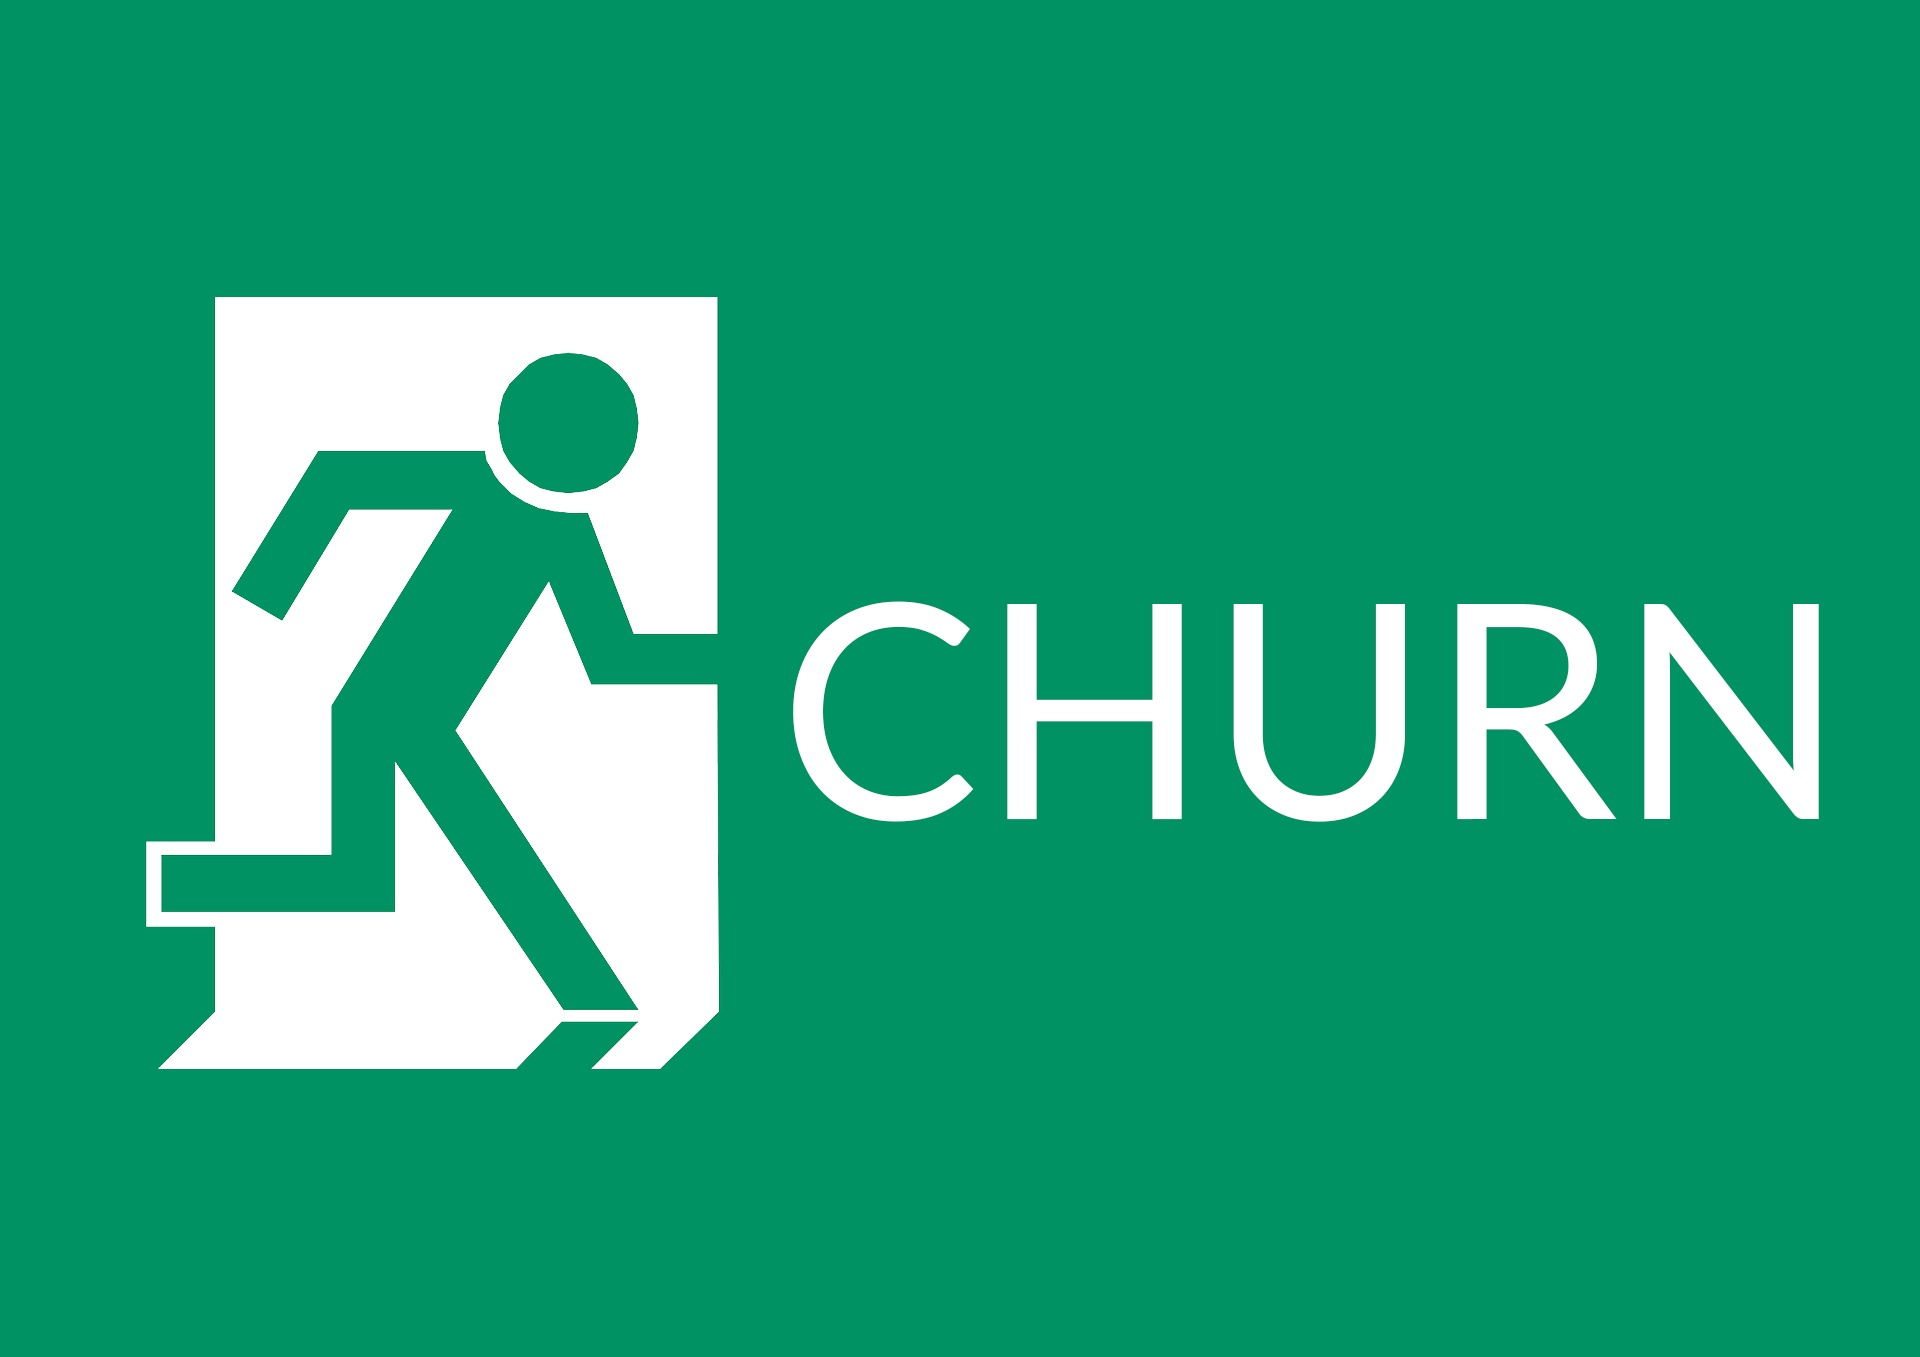

Como podremos saber, una empresa vende un producto o presta un servicio a sus clientes y de esto obtiene dinero, cumpliendo su objetivo principal el cual es generar ganancias.

Por ello, este proyecto aputanara a uno de los componentes mas importantes de una empresa que son los clientes. Mas especificamente, analizaremos el abandono de los mismos, o mas conocido como customer chrun en ingles. 

Utilizaremos un dataset brindando por un banco anonimo, con datos de su cartera de clientes. Como podremos observar el customer churn rate o taza de abandono de clientes es bastante elevado 

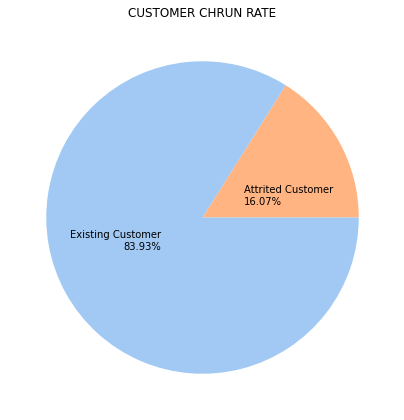

In [ ]:
client_count = bank_df['Total_Trans_Amt'].groupby(bank_df['Attrition_Flag']).count()
plt.subplots(figsize = (7,9))
plt.title("CUSTOMER CHRUN RATE")
plt.pie(client_count,
        labels = [client_count.index[0] + "\n" + (str(round((client_count[0]/(client_count[1]+client_count[0]))*100,2))) + "%",
                  client_count.index[1]+ "\n" + (str(round((client_count[1]/(client_count[1]+client_count[0]))*100,2))) + "%"],
        colors = (sns.color_palette('pastel')[1],sns.color_palette('pastel')[0]),
        labeldistance=0.3)

plt.show()

Esto quiere decir que desde el año anterior a dia de hoy el banco perdio un 16,07% de sus clientes. 

# 1- OBJETIVOS

**Objetivos principales**

- Descubrir la causa por la cual hay deserción de clientes en las tarjetas de crédito
-Pronosticar cuales son los posibles clientes que abandonaran las tarjetas de crédito

**Objetivos secuendarios**

- Determinar que Modelo se adapta de mejor manera a las necesidades del problema
- Utilizar modelo para predecir grupos de clientes que abandonarian el banco
- Testear modelos generados

# 2-Contexto comercial

El Gerente comercial de un banco se encuentra frente a un listado de clientes que utilizan el servicio de tarjetas de crédito y detecta una alta taza de abandono de los mismos. Quieren analizar los datos para descubrir la razón detrás de esto y aprovechar lo mismo para predecir los clientes que probablemente abandonarán para poder tomar medidas sobre esto.

# 3- Problema comercial

### Hipótesis 1
H1 = La media del monto total de transacciones (Total_Trans_Amt) es igual para clientes activos y retirados

H0 = La media del monto total de transacciones (Total_Trans_Amt) es diferente para clientes activos y retirados

### Hipótesis 2


H2 = La media de la cantidad total de transacciones (Total_Trans_Ct) es **igual** para clientes activos y retirados

H0 = La media de la cantidad total de transacciones (Total_Trans_Ct) es **diferente** para clientes activos y retirados

## Hipótesis 3

H3 = La media de la variacion en cantidad de transacciones Q4 -Q1 (1) es **igual** para clientes activos y retirados 

H0 = La media de la variacion en cantidad de transacciones Q4 -Q1 (Total_Ct_Chng_Q4_Q1) es **diferente** para clientes activos y retirados

## Pregunta 1
 ¿Cúal es el género que más abandona la tarjeta de crédito?

## Pregunta 2
 Los que abandonan la tarjeta de crédito, ¿Cúal es su estado civil?

## Pregunta 3
 ¿Que edades promedio tienen las personas que abandonan las tarjetas de crédito?

## Pregunta 4
¿Cuanto tiempo en promedio llevan las tarjetas sin utilizar de las personas que abandonan la tarjeta de crédito?

## Pregunta 5 
¿Que tipo de tarjeta usan los clientes que abandonan los servicios?

## Pregunta 6 
¿Que nivel de educacion tienen los clientes que abanonan los servicios?

## Pregunta 7
¿Que nivel de ingresos tienen los clientes que abandonan los servicios?



# 4- Glosario



**Diccionario de Variables**

CLIENTNUM Client number. Unique identifier for the customer holding the account

Attrition_FlagInternal event (customer activity) variable - if the account is closed then 1 else 0

Customer_Age Demographic variable - Customer's Age in Years

Gender Demographic variable - M=Male, F=Female

Dependent_count Demographic variable - Number of dependents

Education_Level Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)

Marital_Status Demographic variable - Married, Single, Divorced, Unknown

Income_Category Demographic variable - Annual Income Category of the account holder (< 40K, 40K - 60K, $60K - 80K, 80K-120K, > 120K, Unknown)

Card_Category Product Variable - Type of Card (Blue, Silver, Gold, Platinum)

Months_on_book Period of relationship with bank

Total_Relationship_Count Total no. of products held by the customer

Months_Inactive_12_mon No. of months inactive in the last 12 months

Contacts_Count_12_mon No. of Contacts in the last 12 months

Credit_Limit Credit Limit on the Credit Card

Total_Revolving_Bal Total Revolving Balance on the Credit Card

Avg_Open_To_Buy Open to Buy Credit Line (Average of last 12 months)

Total_Amt_Chng_Q4_Q1 Change in Transaction Amount (Q4 over Q1)

Total_Trans_Amt Total Transaction Amount (Last 12 months)

Total_Trans_Ct Total Transaction Count (Last 12 months)

Total_Ct_Chng_Q4_Q1 Change in Transaction Count (Q4 over Q1)

Avg_Utilization_Ratio Average Card Utilization Ratio


Por recomendacion de la fuente de informacion, se recomienda eliminar las 2 ultimas columnas del dataset.

In [ ]:
bank_df = bank_df.drop(columns=["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"])

# 5-Análisis Exploratorio de Datos (EDA)

**Antes de iniciar a analizar las hipotesis se parocede a analizar de manera rapida los datos, por un lado se hace un "describe" y por otro se realiza una serie de histogramas para cada una de las columnas con el objetivo de ver si se puede apreciar algun patrón interesante a ser analizado. Como el objetivo de este analisis es predecir el "Attrition_Flag" se realizo una agrupacon por esta categoria.**

In [ ]:
bank_df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


Tambien eliminaremos la columna CLIENTNUM ya que no aportara ningun valor al analisis

In [ ]:
bank_df = bank_df.drop(columns=["CLIENTNUM"])

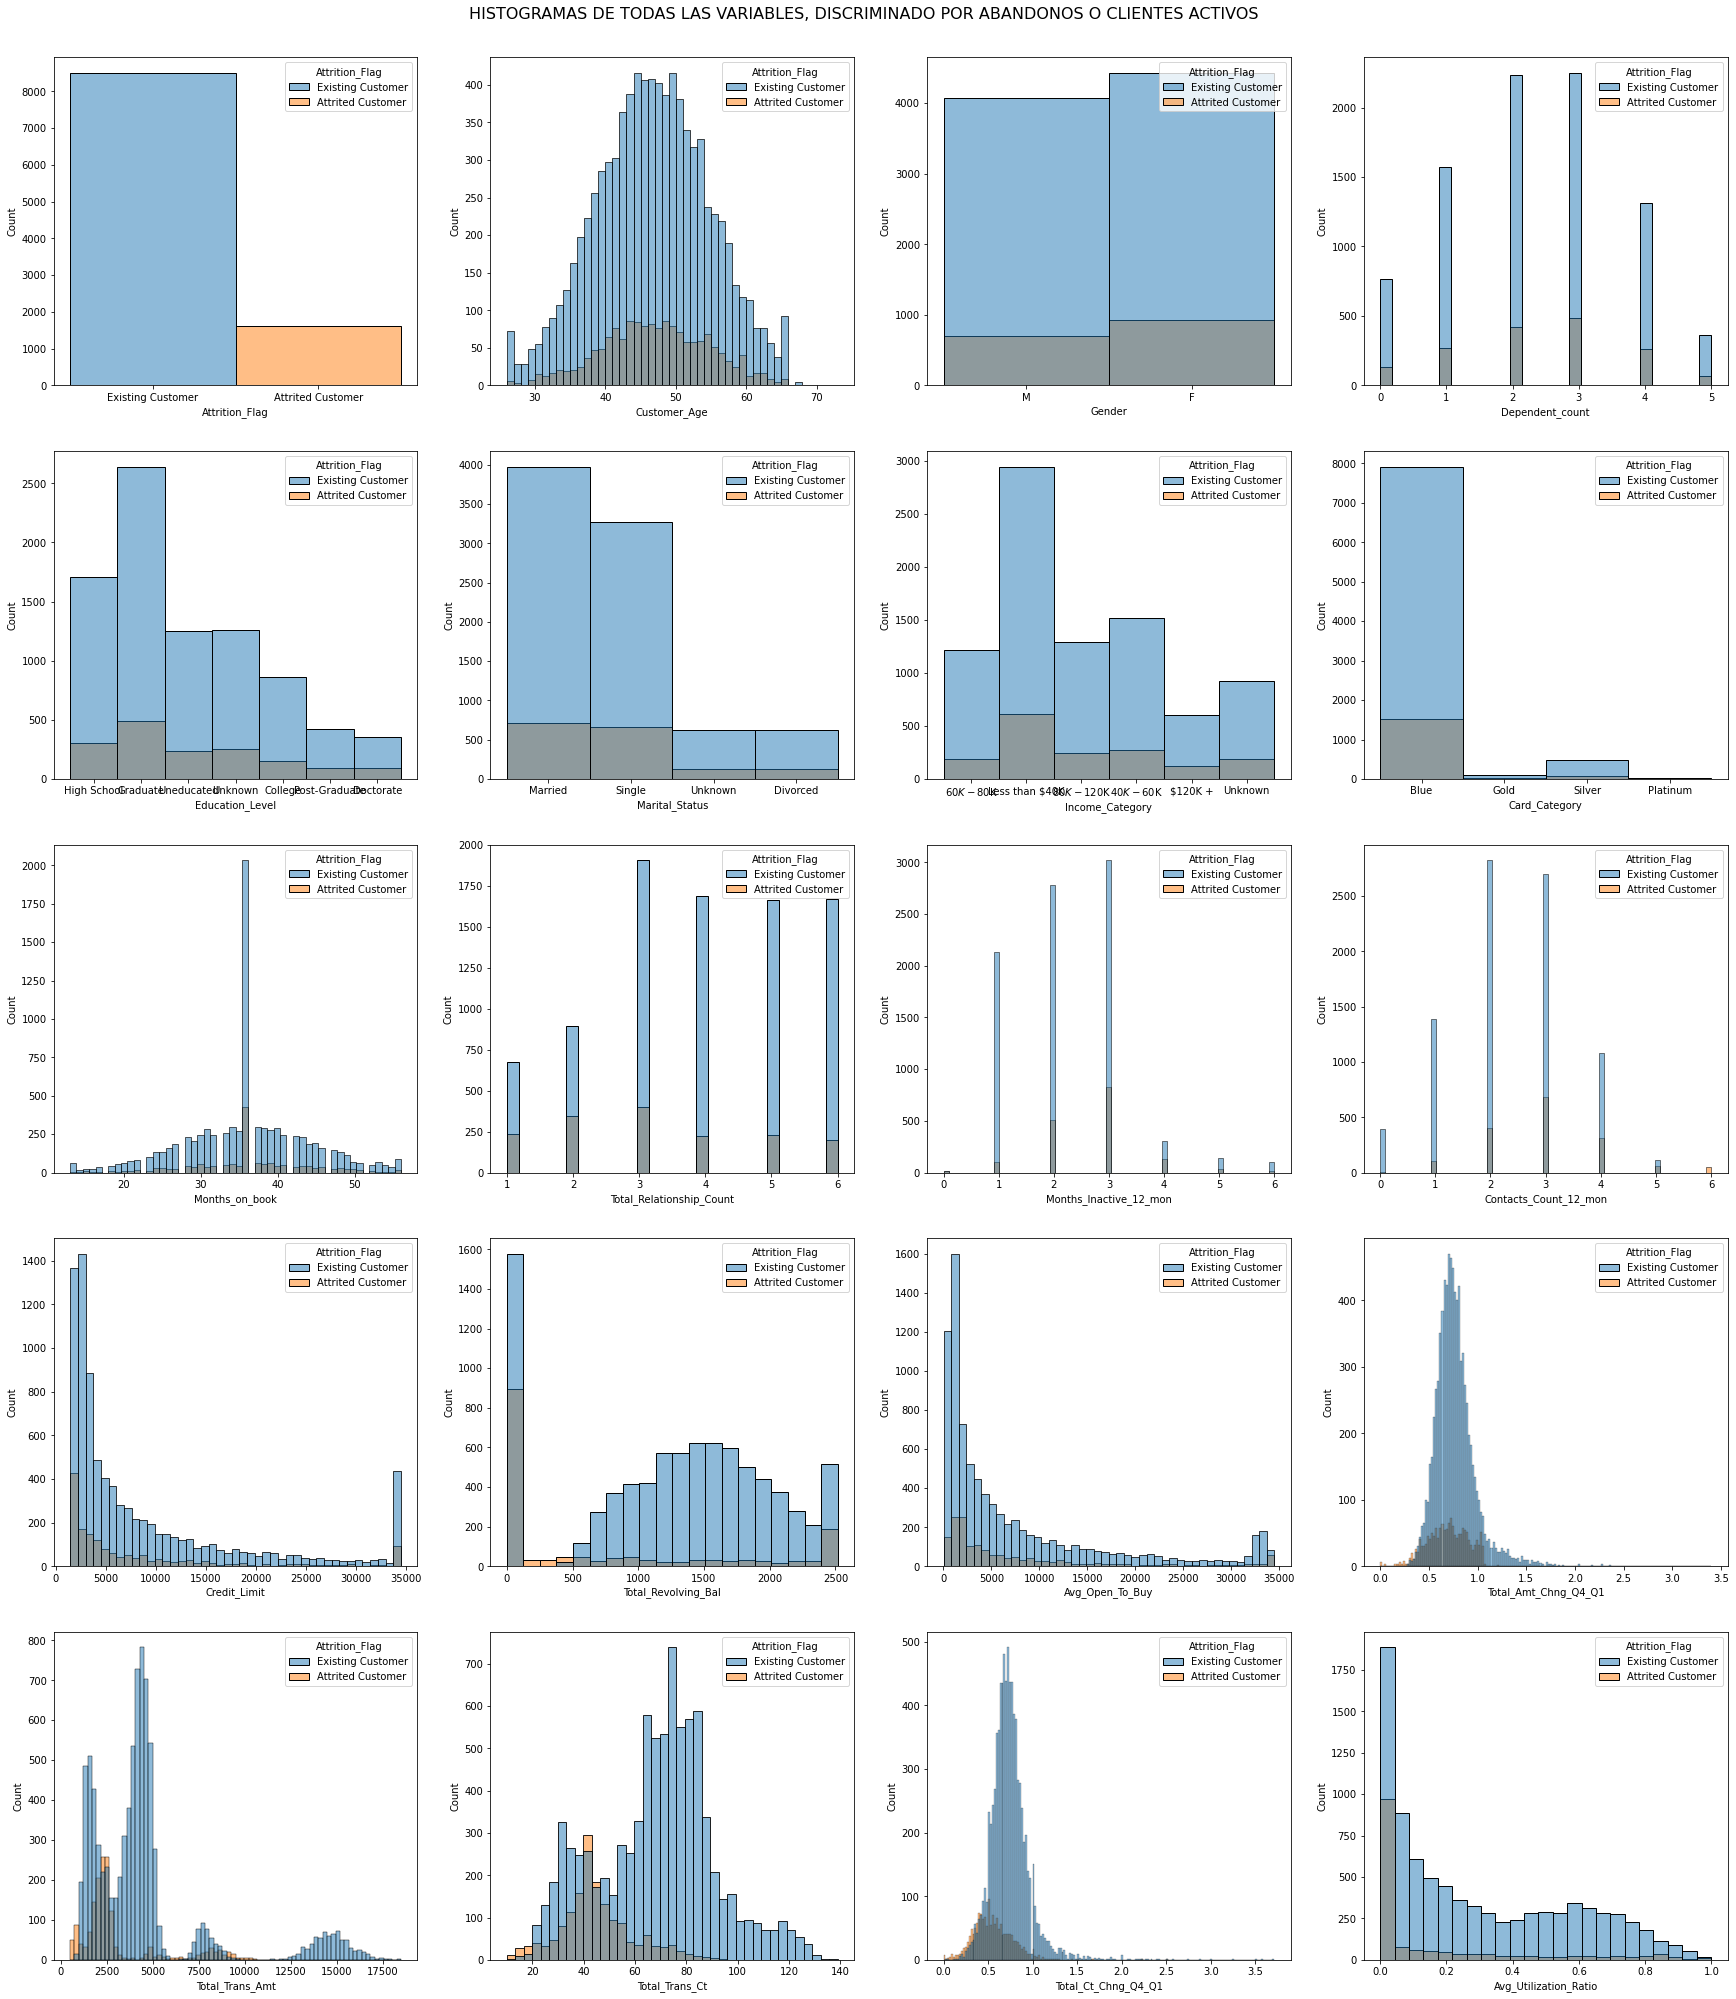

In [ ]:
columns_name = list(bank_df.columns.values)  
#  Se arma una lista con los nombres de las columnas para usarla a continuacion

fig , axes = plt.subplots(5,4,figsize = (30,35))
plt.suptitle('HISTOGRAMAS DE TODAS LAS VARIABLES, DISCRIMINADO POR ABANDONOS O CLIENTES ACTIVOS',fontsize=16,y = 0.9)
i = 0
for fil in range(5):
  for col in range(4):
    if i <=20:                     #esta condicion se plantea ya que las ultimas 2 columnas del dataset no hay que usarlas para analisi segun la pagina
        sns.histplot(data=bank_df,
              ax=axes[fil,col],
              x=columns_name[i],
              hue = 'Attrition_Flag'
              )
        i = i + 1
plt.show()

## Análisis de las hipótesis planteadas y respuesta a las preguntas



### Hipótesis 1


H1 = La media del monto total de transacciones (Total_Trans_Amt) es igual para clientes activos y retirados

H0 = La media del monto total de transacciones (Total_Trans_Amt) es diferente para clientes activos y retirados

In [ ]:
media_tta = bank_df['Total_Trans_Amt'].groupby(bank_df['Attrition_Flag']).mean()
sum_tta = bank_df['Total_Trans_Amt'].groupby(bank_df['Attrition_Flag']).sum()
print('media del monto total de transacciones por Attrition Flag')
print(media_tta)
print('_ '*30)
print(' ')
print('suma del monto total de transacciones por Attrition Flag')
print(sum_tta)

media del monto total de transacciones por Attrition Flag
Attrition_Flag
Attrited Customer    3095.025814
Existing Customer    4654.655882
Name: Total_Trans_Amt, dtype: float64
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
 
suma del monto total de transacciones por Attrition Flag
Attrition_Flag
Attrited Customer     5035607
Existing Customer    39564575
Name: Total_Trans_Amt, dtype: int64


Se nota que los valores de las medias son diferentes. Por lo que se descarta la H1 y se validaria la H0.

En función de esto, se procede a analizar mas a detalle. Para ello se realizan 2 graficos, un histograma y un boxplot con el objetivo de determinar que tipo de distribucion siguen los datos y para determinar la existencia de outliers. En caso de que se encuentren outliers la media no es una medida muy representativa, por lo que se analizara con la mediana.

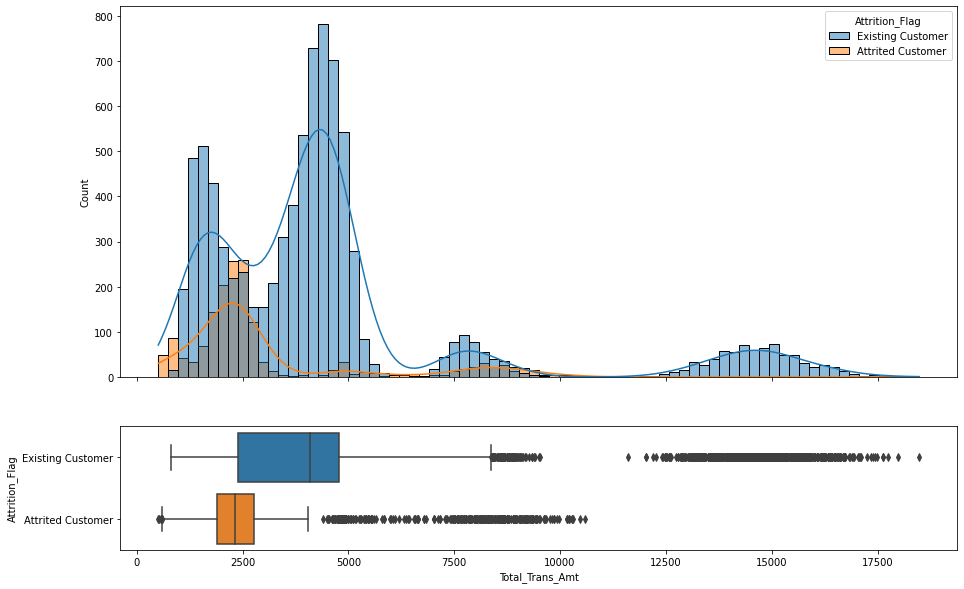

In [ ]:
fig,axes = plt.subplots(2,1,figsize=(15,10),
                        sharex = True,
                        gridspec_kw={'height_ratios':[3,1]})
sns.histplot(ax = axes[0],
             data  =bank_df,
             x = "Total_Trans_Amt",
             hue = "Attrition_Flag",
             kde = True,
             )
sns.boxplot(ax = axes[1],
            data = bank_df,
            x = "Total_Trans_Amt",
            y = "Attrition_Flag"
            )
plt.show()

Se observa gran cantidad de outliers, por lo que se analizara la mediana.

In [ ]:
mediana_tta = bank_df['Total_Trans_Amt'].groupby(bank_df['Attrition_Flag']).median()
print('mediana del monto total de transacciones por Attrition Flag')
print(mediana_tta)

mediana del monto total de transacciones por Attrition Flag
Attrition_Flag
Attrited Customer    2329.0
Existing Customer    4100.0
Name: Total_Trans_Amt, dtype: float64


Ahora se calculan los Q1 y Q3 para sacar el IQR 
Vamos a usar una A para referirnos a los clientes ACTIVOS y una R para los clientes RETIRADOS

In [ ]:
Q1R = bank_df[bank_df['Attrition_Flag'] == "Attrited Customer"].Total_Trans_Amt.quantile(0.25)
Q3R = bank_df[bank_df['Attrition_Flag'] == "Attrited Customer"].Total_Trans_Amt.quantile(0.75)
print("Q1R = ",Q1R)
print("Q3R = ",Q3R)
print("IQR Retirados = ", Q3R-Q1R)

Q1A = bank_df[bank_df['Attrition_Flag'] != "Attrited Customer"].Total_Trans_Amt.quantile(0.25)
Q3A = bank_df[bank_df['Attrition_Flag'] != "Attrited Customer"].Total_Trans_Amt.quantile(0.75)
print("Q1A = ",Q1A)
print("Q3A = ",Q3A)
print("IQR Activos = ", Q3A-Q1A)

Q1R =  1903.5
Q3R =  2772.0
IQR Retirados =  868.5
Q1A =  2384.75
Q3A =  4781.25
IQR Activos =  2396.5


Podemos observar que los montos de las transferencias realizadas por clientes activos se concentran entre los 2384 y 4781 USD. Mientras que los montos de las transferencias realizadas por clientes retirados se encuentran entre los 1903 y 2772 USD

### Hipótesis 2



H2 = La media de la cantidad total de transacciones (Total_Trans_Ct) es igual para clientes activos y retirados

H0 = La media de la cantidad total de transacciones (Total_Trans_Ct) es diferente para clientes activos y retirados



In [ ]:
media_ttc = bank_df['Total_Trans_Ct'].groupby(bank_df['Attrition_Flag']).mean()
sum_ttc = bank_df['Total_Trans_Ct'].groupby(bank_df['Attrition_Flag']).sum()
print('media del conteo total de transacciones por Attrition Flag')
print(media_ttc)
print('_ '*30)
print(' ')
print('suma del conteo total de transacciones por Attrition Flag')
print(sum_ttc)

media del conteo total de transacciones por Attrition Flag
Attrition_Flag
Attrited Customer    44.933620
Existing Customer    68.672588
Name: Total_Trans_Ct, dtype: float64
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
 
suma del conteo total de transacciones por Attrition Flag
Attrition_Flag
Attrited Customer     73107
Existing Customer    583717
Name: Total_Trans_Ct, dtype: int64


Se nota que los valores de las medias son diferentes. Por lo que se descarta la H2 y se validaria la H0.

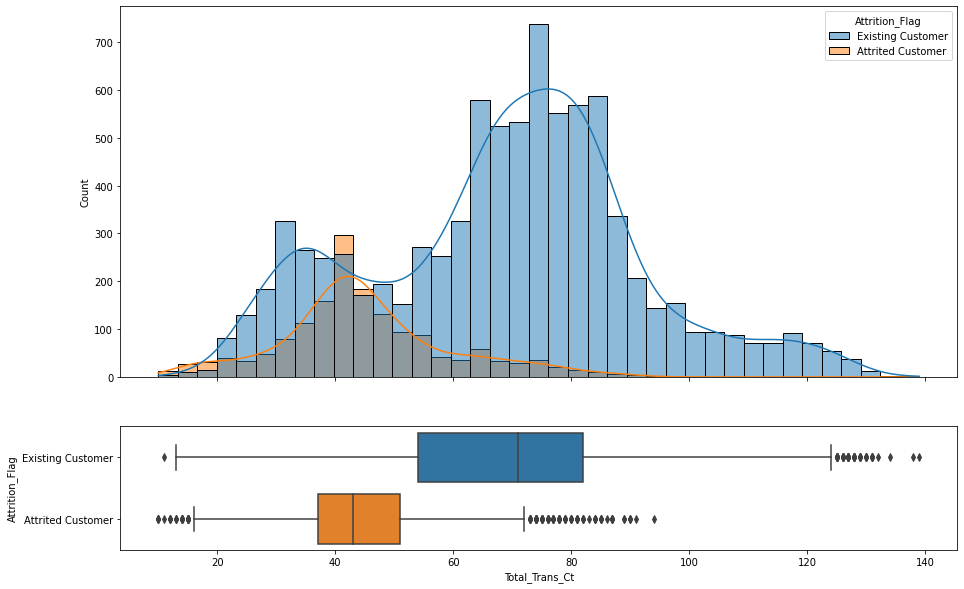

In [ ]:
fig,axes = plt.subplots(2,1,figsize=(15,10),
                        sharex = True,
                        gridspec_kw={'height_ratios':[3,1]})
sns.histplot(ax = axes[0],
             data  =bank_df,
             x = "Total_Trans_Ct",
             hue = "Attrition_Flag",
             kde = True
             )
sns.boxplot(ax = axes[1],
            data = bank_df,
            x = "Total_Trans_Ct",
            y = "Attrition_Flag"
            )
plt.show()

In [ ]:
mediana_ttc = bank_df['Total_Trans_Ct'].groupby(bank_df['Attrition_Flag']).median()
print('Mediana del conteo total de transacciones por Attrition Flag')
print(mediana_ttc)

Mediana del conteo total de transacciones por Attrition Flag
Attrition_Flag
Attrited Customer    43.0
Existing Customer    71.0
Name: Total_Trans_Ct, dtype: float64


Ahora se calculan los Q1 y Q3 para sacar el IQR Vamos a usar una A para referirnos a los clientes ACTIVOS y una R para los clientes RETIRADOS

In [ ]:
Q3R = bank_df[bank_df['Attrition_Flag'] == "Attrited Customer"].Total_Trans_Ct.quantile(0.75)
Q1R = bank_df[bank_df['Attrition_Flag'] == "Attrited Customer"].Total_Trans_Ct.quantile(0.25)
print("Q1R = ",Q1R)
print("Q3R = ",Q3R)
print("IQR Retirados = ", Q3R-Q1R)

Q1A = bank_df[bank_df['Attrition_Flag'] != "Attrited Customer"].Total_Trans_Ct.quantile(0.25)
Q3A = bank_df[bank_df['Attrition_Flag'] != "Attrited Customer"].Total_Trans_Ct.quantile(0.75)
print("Q1A = ",Q1A)
print("Q3A = ",Q3A)
print("IQR Activos = ", Q3A-Q1A)

Q1R =  37.0
Q3R =  51.0
IQR Retirados =  14.0
Q1A =  54.0
Q3A =  82.0
IQR Activos =  28.0


Podemos observar que la cantiad de transferencias realizada por clientes activos se encunentra entre 54 y 82. Mientras que la cantidad de transferencias realizadas por clientes retirados se concentra entre 37 y 51.

### Hipótesis 3


H3 = La media de la variacion en cantidad de transacciones Q4 -Q1 (1) es igual para clientes activos y retirados

H0 = La media de la variacion en cantidad de transacciones Q4 -Q1 (Total_Ct_Chng_Q4_Q1) es diferente para clientes activos y retirados

In [ ]:
media_tcc_Q4Q1= bank_df['Total_Ct_Chng_Q4_Q1'].groupby(bank_df['Attrition_Flag']).mean()
sum_tcc_Q4Q1 = bank_df['Total_Ct_Chng_Q4_Q1'].groupby(bank_df['Attrition_Flag']).sum()
print('Media de cantidad de transferencias realizadas por Attrition Flag')
print(media_tcc_Q4Q1)
print('_ '*33)
print(' ')
print('Suma de cantidad de transferencias realizadas por Attrition Flag')
print(sum_tcc_Q4Q1)

Media de cantidad de transferencias realizadas por Attrition Flag
Attrition_Flag
Attrited Customer    0.554386
Existing Customer    0.742434
Name: Total_Ct_Chng_Q4_Q1, dtype: float64
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
 
Suma de cantidad de transferencias realizadas por Attrition Flag
Attrition_Flag
Attrited Customer     901.986
Existing Customer    6310.690
Name: Total_Ct_Chng_Q4_Q1, dtype: float64


Se nota que los valores de las medias son diferentes. Por lo que se descarta la H3 y se validaria la H0.

In [1]:
fig,axes = plt.subplots(2,1,figsize=(15,10),
                        sharex = True,
                        gridspec_kw={'height_ratios':[3,1]})
sns.histplot(ax = axes[0],
             data  =bank_df,
             x = "Total_Ct_Chng_Q4_Q1",
             hue = "Attrition_Flag",
             kde = True
             )
sns.boxplot(ax = axes[1],
            data = bank_df,
            x = "Total_Ct_Chng_Q4_Q1",
            y = "Attrition_Flag"
            )
plt.show()

NameError: name 'plt' is not defined

In [ ]:
mediana_tcc_Q4Q1= bank_df['Total_Ct_Chng_Q4_Q1'].groupby(bank_df['Attrition_Flag']).median()
print('Mediana de cantidad de transferencias realizadas por Attrition Flag')
print(mediana_tcc_Q4Q1)

Mediana de cantidad de transferencias realizadas por Attrition Flag
Attrition_Flag
Attrited Customer    0.531
Existing Customer    0.721
Name: Total_Ct_Chng_Q4_Q1, dtype: float64


Ahora se calculan los Q1 y Q3 para sacar el IQR Vamos a usar una A para referirnos a los clientes ACTIVOS y una R para los clientes RETIRADOS

In [ ]:
Q3R = bank_df[bank_df['Attrition_Flag'] == "Attrited Customer"].Total_Ct_Chng_Q4_Q1.quantile(0.75)
Q1R = bank_df[bank_df['Attrition_Flag'] == "Attrited Customer"].Total_Ct_Chng_Q4_Q1.quantile(0.25)
print("Q1R = ",Q1R)
print("Q3R = ",Q3R)
print("IQR Retirados = ", Q3R-Q1R)

Q1A = bank_df[bank_df['Attrition_Flag'] != "Attrited Customer"].Total_Ct_Chng_Q4_Q1.quantile(0.25)
Q3A = bank_df[bank_df['Attrition_Flag'] != "Attrited Customer"].Total_Ct_Chng_Q4_Q1.quantile(0.75)
print("Q1A = ",Q1A)
print("Q3A = ",Q3A)
print("IQR Activos = ", Q3A-Q1A)

Q1R =  0.4
Q3R =  0.692
IQR Retirados =  0.2919999999999999
Q1A =  0.617
Q3A =  0.833
IQR Activos =  0.21599999999999997


Podemos observar que la variación de la cantidad de transferencias realizadas por clientes activos se encuentra entre 0,61 y 0,833. Mientras que la cantidad de transferencias realizadas por clientes retirados se concentra entre 0,4 y 0,692..

### Pregunta 1 ¿Cúal es el género que más abandona la tarjeta de crédito?

In [ ]:
gender_count = bank_df['Gender'].groupby(bank_df['Attrition_Flag']).value_counts()
print('Gender_count \n',gender_count)

Gender_count 
 Attrition_Flag     Gender
Attrited Customer  F          930
                   M          697
Existing Customer  F         4428
                   M         4072
Name: Gender, dtype: int64


In [ ]:
gender_df = bank_df['Attrition_Flag'].groupby(bank_df['Gender']).value_counts().unstack()
gender_df['%_out'] = gender_df['Attrited Customer'] / (gender_df['Attrited Customer'] + gender_df['Existing Customer'])
gender_df.sort_values('%_out',ascending=False)

Attrition_Flag,Attrited Customer,Existing Customer,%_out
Gender,,,
F,930,4428,0.173572
M,697,4072,0.146152


Dentro del genero femenino, abandonan aproximadamente un 17%

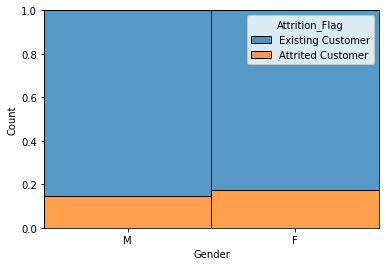

In [ ]:
ax = sns.histplot(bank_df,
             x = 'Gender',
             hue ='Attrition_Flag',
             multiple = 'fill',
             stat = 'count')
plt.show()

### Pregunta 2: ¿Cúal es el estado civil de los clientes que abandonan el servicio?


In [ ]:
marital_statuts_count = bank_df['Marital_Status'].groupby(bank_df['Attrition_Flag']).value_counts()
print('Marital_statuts_count \n',marital_statuts_count,)

Marital_statuts_count 
 Attrition_Flag     Marital_Status
Attrited Customer  Married            709
                   Single             668
                   Unknown            129
                   Divorced           121
Existing Customer  Married           3978
                   Single            3275
                   Divorced           627
                   Unknown            620
Name: Marital_Status, dtype: int64


In [ ]:
marital_status_df = bank_df['Attrition_Flag'].groupby(bank_df['Marital_Status']).value_counts().unstack()
marital_status_df['%_out'] = marital_status_df['Attrited Customer'] / (marital_status_df['Attrited Customer'] + marital_status_df['Existing Customer'])
marital_status_df.sort_values('%_out',ascending=False)

Attrition_Flag,Attrited Customer,Existing Customer,%_out
Marital_Status,,,
Unknown,129,620,0.172230
Single,668,3275,0.169414
Divorced,121,627,0.161765
Married,709,3978,0.151269


Dentro del genero desconocido, un 17% abandona el servicio 

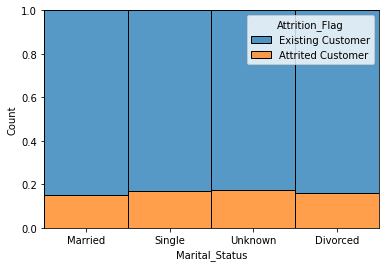

In [ ]:
ax = sns.histplot(bank_df,
             x = 'Marital_Status',
             hue ='Attrition_Flag',
             multiple = 'fill',
             stat = 'count')
plt.show()

### Pregunta 3 ¿Que edades promedio tienen las personas que abandonan las tarjetas de crédito?

In [ ]:
mean_years = bank_df['Customer_Age'].groupby(bank_df['Attrition_Flag']).mean()
print('mean_years \n',mean_years['Attrited Customer'])

mean_years 
 46.659496004917024


### Pregunta 4 ¿Cuanto tiempo sin utilizacion llevan las tarjetas de los clientes que abandonan?

In [ ]:
mean_time = bank_df['Months_Inactive_12_mon'].groupby(bank_df['Attrition_Flag']).mean()
print('mean_time \n',mean_time['Attrited Customer'])

mean_time 
 2.693300553165335


### Pregunta 5 ¿Que tipo de tarjeta usan los clientes que abandonan los servicios?

In [ ]:
card_type = bank_df['Card_Category'].groupby(bank_df['Attrition_Flag']).value_counts()
print('card_type \n',card_type)

card_type 
 Attrition_Flag     Card_Category
Attrited Customer  Blue             1519
                   Silver             82
                   Gold               21
                   Platinum            5
Existing Customer  Blue             7917
                   Silver            473
                   Gold               95
                   Platinum           15
Name: Card_Category, dtype: int64


In [ ]:
card_type_df = bank_df['Attrition_Flag'].groupby(bank_df['Card_Category']).value_counts().unstack()
card_type_df['%_out'] = card_type_df['Attrited Customer'] / (card_type_df['Attrited Customer'] + card_type_df['Existing Customer'])
card_type_df.sort_values('%_out',ascending=False)

Attrition_Flag,Attrited Customer,Existing Customer,%_out
Card_Category,,,
Platinum,5,15,0.250000
Gold,21,95,0.181034
Blue,1519,7917,0.160979
Silver,82,473,0.147748


Dentro de la categoria platinum, un 25% abandona el servicio. 

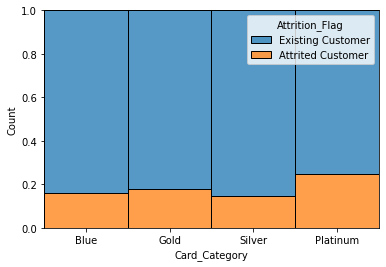

In [ ]:
ax = sns.histplot(bank_df,
             x = 'Card_Category',
             hue ='Attrition_Flag',
             multiple = 'fill',
             stat = 'count')
plt.show()

### Pregunta 6 ¿Que nivel de educacion tienen los clientes que abanonan los servicios?

In [ ]:
education_count = bank_df['Education_Level'].groupby(bank_df['Attrition_Flag']).value_counts()
print('education_count \n',education_count)

education_count 
 Attrition_Flag     Education_Level
Attrited Customer  Graduate            487
                   High School         306
                   Unknown             256
                   Uneducated          237
                   College             154
                   Doctorate            95
                   Post-Graduate        92
Existing Customer  Graduate           2641
                   High School        1707
                   Unknown            1263
                   Uneducated         1250
                   College             859
                   Post-Graduate       424
                   Doctorate           356
Name: Education_Level, dtype: int64


In [ ]:
education_df = bank_df['Attrition_Flag'].groupby(bank_df['Education_Level']).value_counts().unstack()
education_df['%_out'] = education_df['Attrited Customer'] / (education_df['Attrited Customer'] + education_df['Existing Customer'])
education_df.sort_values('%_out',ascending=False)

Attrition_Flag,Attrited Customer,Existing Customer,%_out
Education_Level,,,
Doctorate,95,356,0.210643
Post-Graduate,92,424,0.178295
Unknown,256,1263,0.168532
Uneducated,237,1250,0.159381
Graduate,487,2641,0.155691
College,154,859,0.152024
High School,306,1707,0.152012


Dentro de el nivel de educacion Doctorado, el 21% abandona el servicio 

In [1]:
ax = sns.histplot(bank_df,
             x = 'Education_Level',
             hue ='Attrition_Flag',
             multiple = 'fill',
             stat = 'count')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.show()

NameError: name 'sns' is not defined

### Pregunta 7 ¿Que nivel de ingresos tienen los clientes que abandonan los servicios?

In [ ]:
income_level = bank_df['Income_Category'].groupby(bank_df['Attrition_Flag']).value_counts()
print('income_level \n',income_level)

income_level 
 Attrition_Flag     Income_Category
Attrited Customer  Less than $40K      612
                   $40K - $60K         271
                   $80K - $120K        242
                   $60K - $80K         189
                   Unknown             187
                   $120K +             126
Existing Customer  Less than $40K     2949
                   $40K - $60K        1519
                   $80K - $120K       1293
                   $60K - $80K        1213
                   Unknown             925
                   $120K +             601
Name: Income_Category, dtype: int64


In [ ]:
income_lvl_df = bank_df['Attrition_Flag'].groupby(bank_df['Income_Category']).value_counts().unstack()
income_lvl_df['%_out'] = income_lvl_df['Attrited Customer'] / (income_lvl_df['Attrited Customer'] + income_lvl_df['Existing Customer'])
income_lvl_df.sort_values('%_out',ascending=False)

Attrition_Flag,Attrited Customer,Existing Customer,%_out
Income_Category,,,
$120K +,126,601,0.173315
Less than $40K,612,2949,0.171862
Unknown,187,925,0.168165
$80K - $120K,242,1293,0.157655
$40K - $60K,271,1519,0.151397
$60K - $80K,189,1213,0.134807


Dentro del nivel de ingresos de +120K, el 17,3% abandona el servicio.

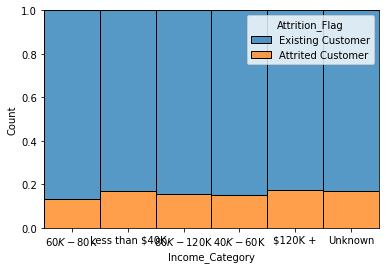

In [ ]:
ax = sns.histplot(bank_df,
             x = 'Income_Category',
             hue ='Attrition_Flag',
             multiple = 'fill',
             stat = 'count')
plt.show()

## Correlación de variables

Se procede a realizar una matriz de correlación para poder determinar si existe o no una relación entre las diferentes variables

Para evitar confusion en los datos, se hace la matriz de correlacion pero con los valores absoltuos. De esta forma, todos los coeficientes seran positivos.

Podemos observar que la matriz de correlacion solo se calcula sobre valores numericos. Los valores categoricos fueron quitados de los datos de forma automatica.

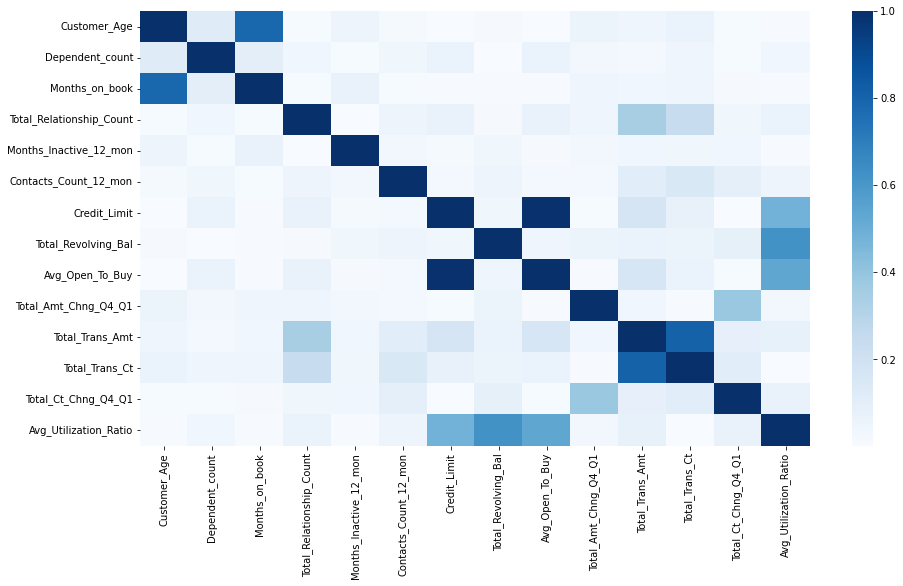

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(data=bank_df.corr().abs(), cmap='Blues')

Tal y como se planteo unos pasos mas arriba, tenemos valores categoricos o del tipo "object" por lo que no podremos sacar mayores conclusiones sin antes quitarlos.

In [ ]:
def parejas(df):
    '''Obtiene diagonal inferior de parejas en matriz de correlacion'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def correlaciones(data, n=5):
    au_corr = data.corr().abs().unstack()
    labels_to_drop = parejas(data)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]


In [ ]:
df = bank_df.drop(columns=['Card_Category','Marital_Status','Income_Category','Education_Level','Gender','Attrition_Flag'])   
# Aqui quitamos todas las columnas categoricas

In [ ]:
df2 =correlaciones(df,10)
df2

Credit_Limit              Avg_Open_To_Buy          0.995981
Total_Trans_Amt           Total_Trans_Ct           0.807192
Customer_Age              Months_on_book           0.788912
Total_Revolving_Bal       Avg_Utilization_Ratio    0.624022
Avg_Open_To_Buy           Avg_Utilization_Ratio    0.538808
Credit_Limit              Avg_Utilization_Ratio    0.482965
Total_Amt_Chng_Q4_Q1      Total_Ct_Chng_Q4_Q1      0.384189
Total_Relationship_Count  Total_Trans_Amt          0.347229
                          Total_Trans_Ct           0.241891
Credit_Limit              Total_Trans_Amt          0.171730
dtype: float64

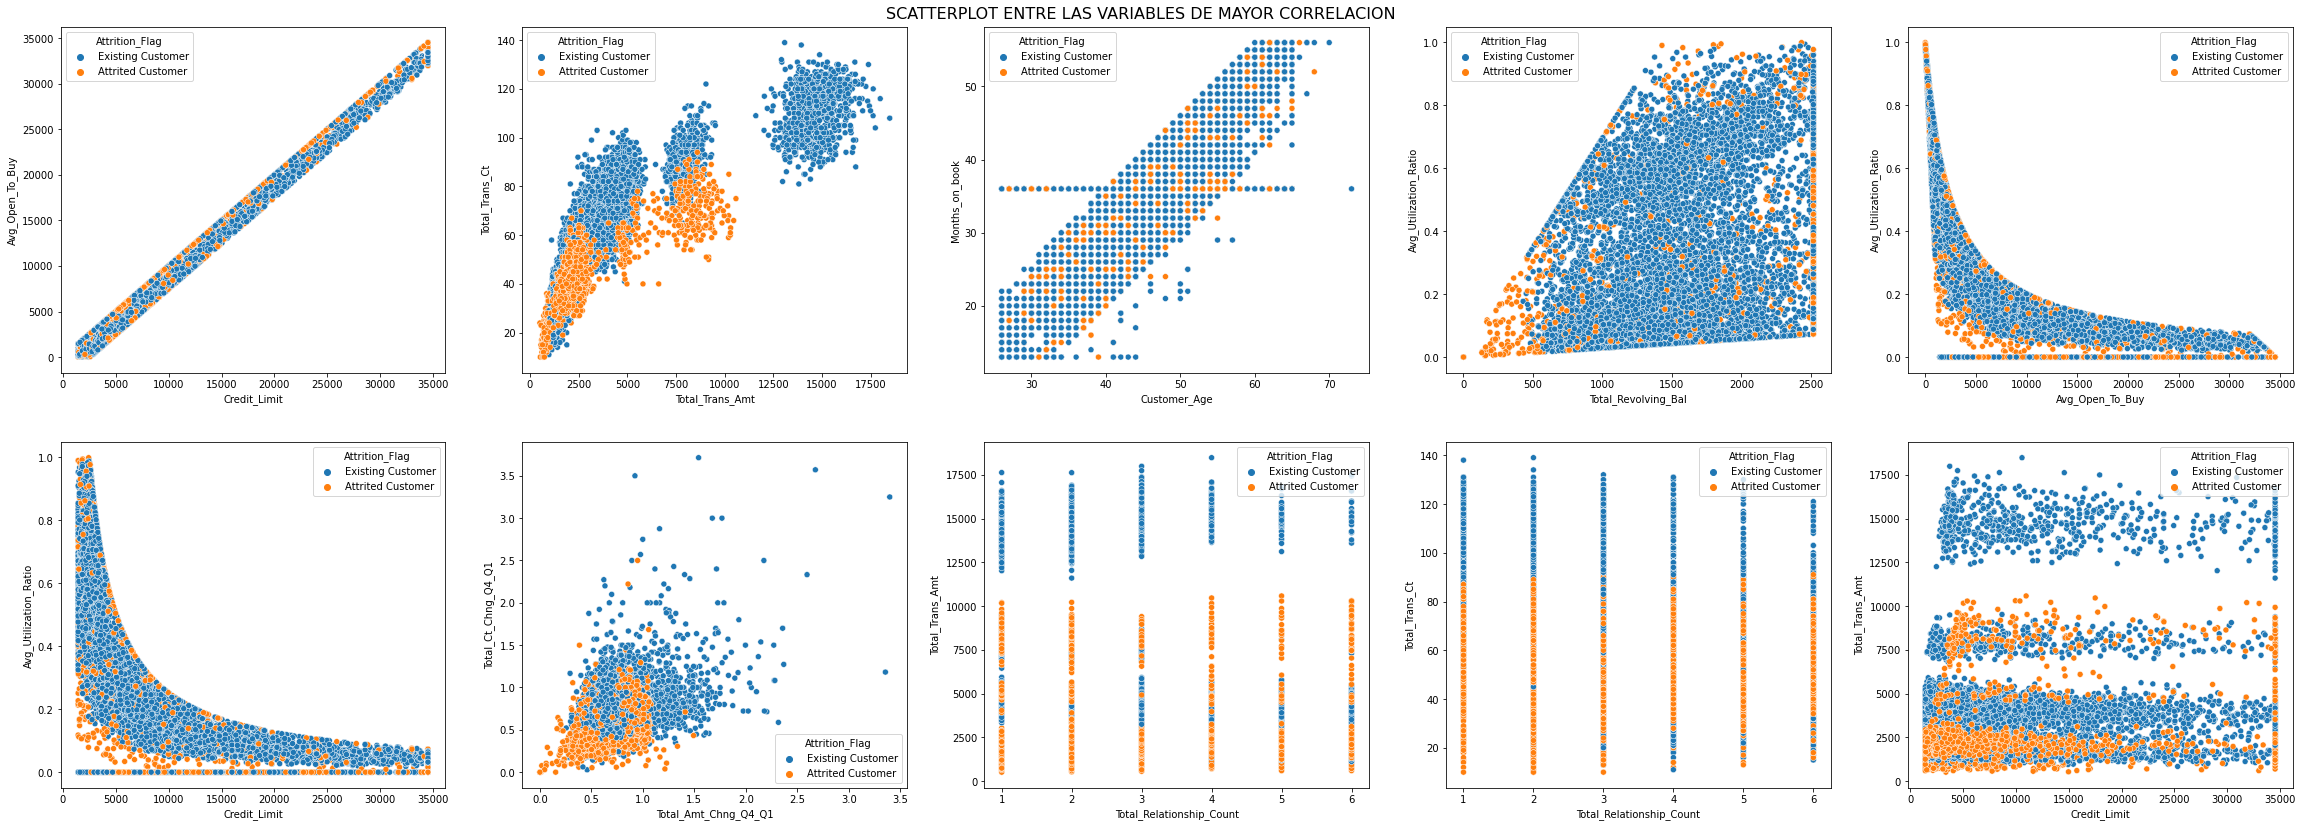

In [ ]:
fig , axes = plt.subplots(2,5,figsize = (40,14))
plt.suptitle('SCATTERPLOT ENTRE LAS VARIABLES DE MAYOR CORRELACION',fontsize=16,y = 0.9)

i = 0
for fil in range(2):
  for col in range(5):
        sns.scatterplot(data=bank_df,
                      ax=axes[fil,col],
                      x=df2.index[i][0], 
                      y=df2.index[i][1],
                      hue ="Attrition_Flag"
                      )
        i = i + 1
plt.show()

Correlacion  Credit_Limit  y  Avg_Open_To_Buy  ==>  0.995980543932001


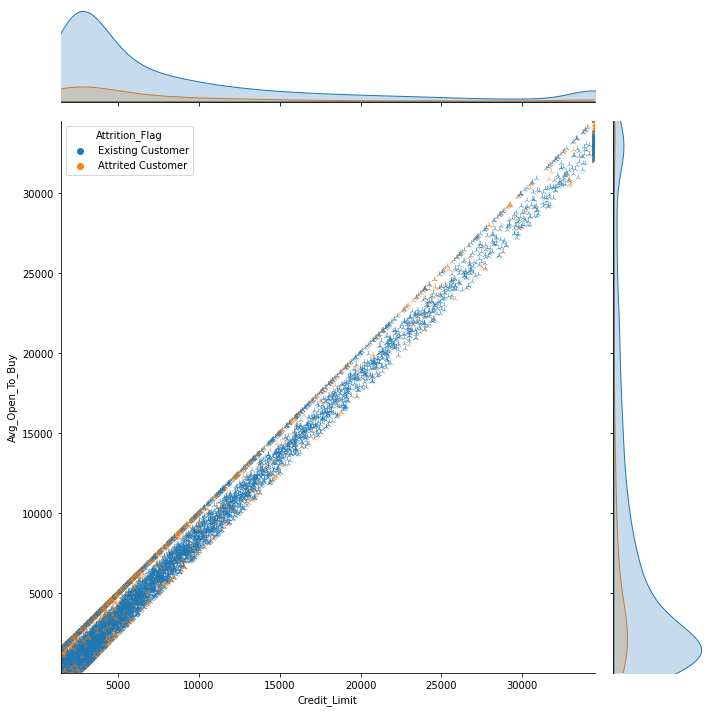

Correlacion  Total_Trans_Amt  y  Total_Trans_Ct  ==>  0.8071920346514367


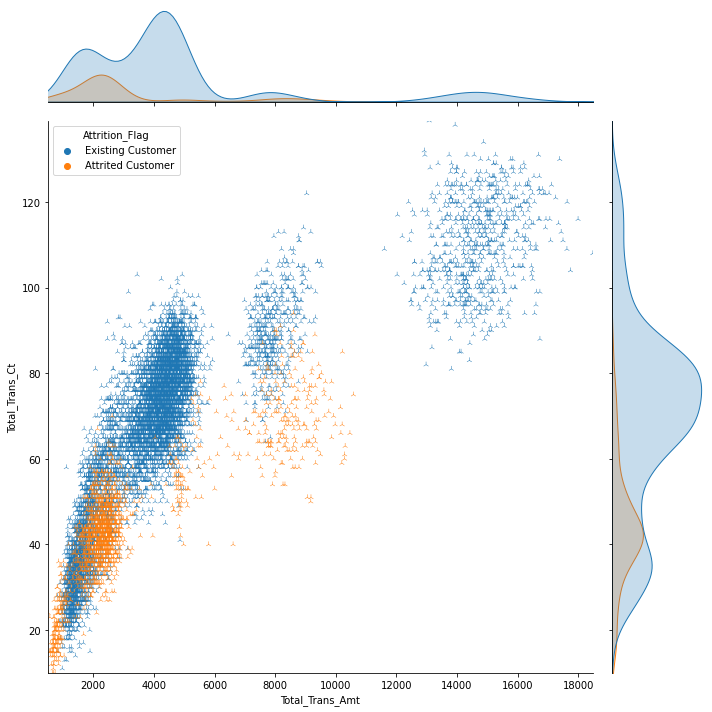

Correlacion  Customer_Age  y  Months_on_book  ==>  0.7889123589930508


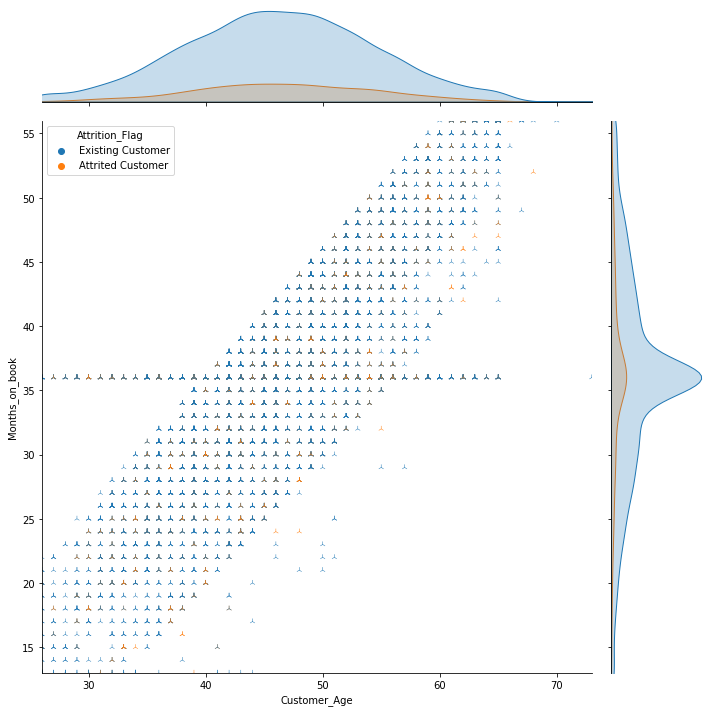

Correlacion  Total_Revolving_Bal  y  Avg_Utilization_Ratio  ==>  0.6240219910059064


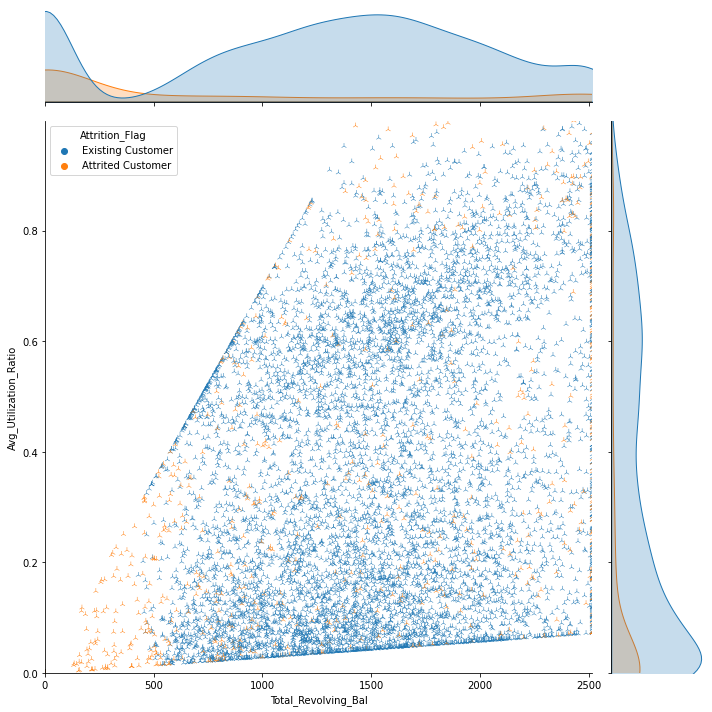

Correlacion  Avg_Open_To_Buy  y  Avg_Utilization_Ratio  ==>  0.5388077476174624


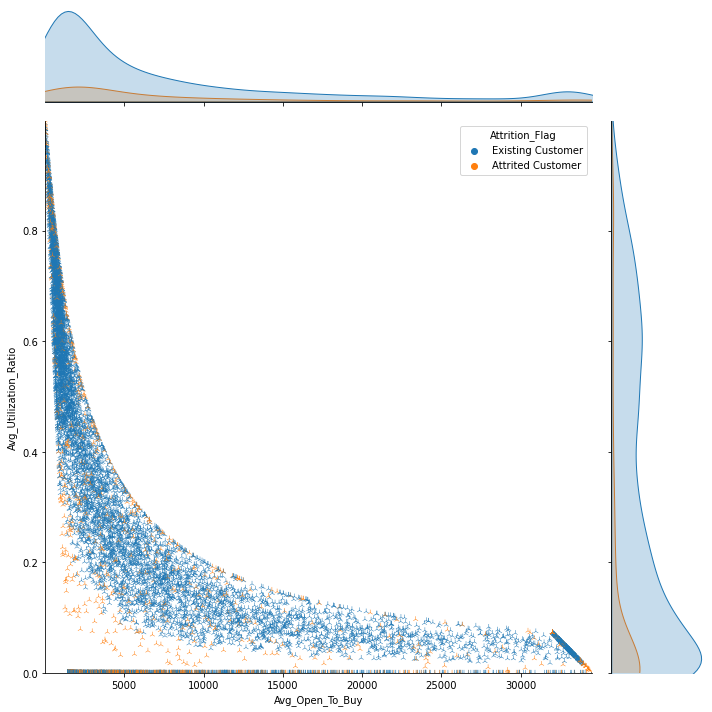

Correlacion  Credit_Limit  y  Avg_Utilization_Ratio  ==>  0.4829650714174503


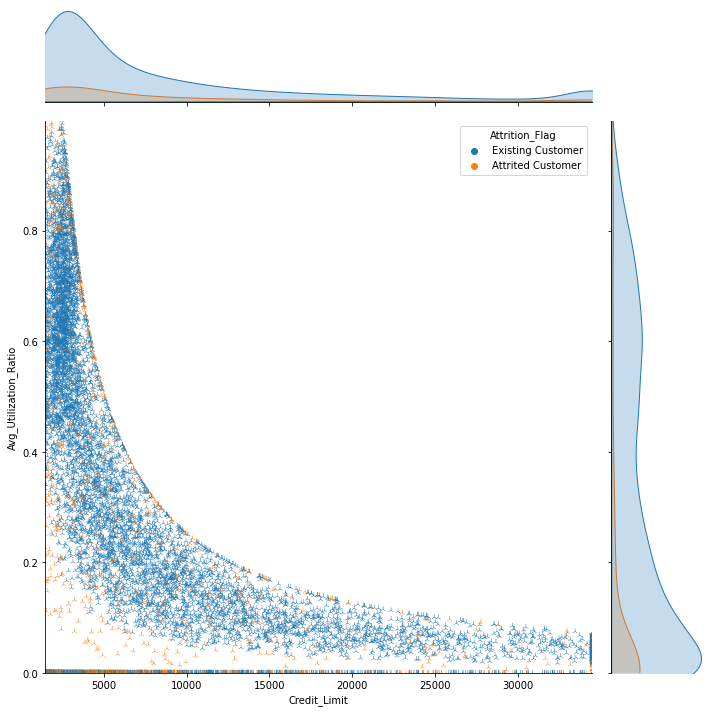

Correlacion  Total_Amt_Chng_Q4_Q1  y  Total_Ct_Chng_Q4_Q1  ==>  0.38418925603371645


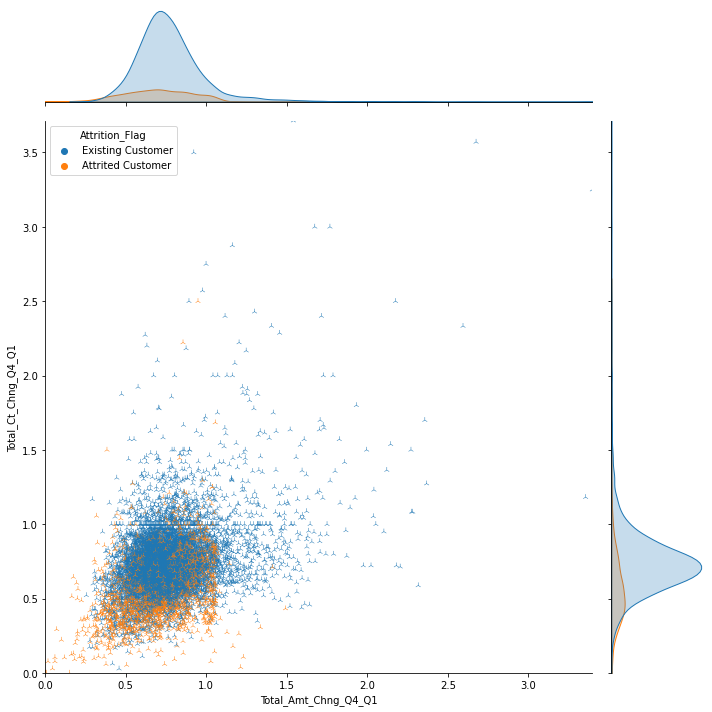

Correlacion  Total_Relationship_Count  y  Total_Trans_Amt  ==>  0.34722887963701443


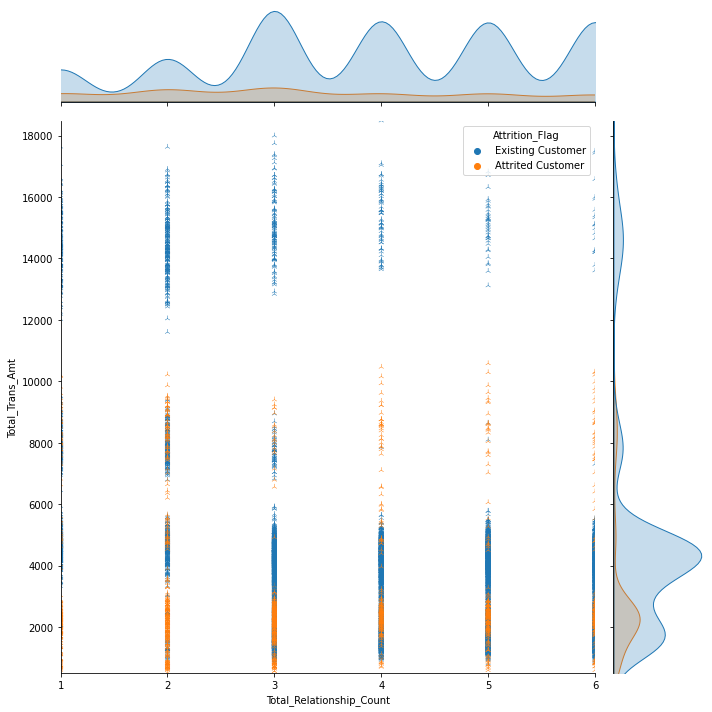

Correlacion  Total_Relationship_Count  y  Total_Trans_Ct  ==>  0.24189084971343594


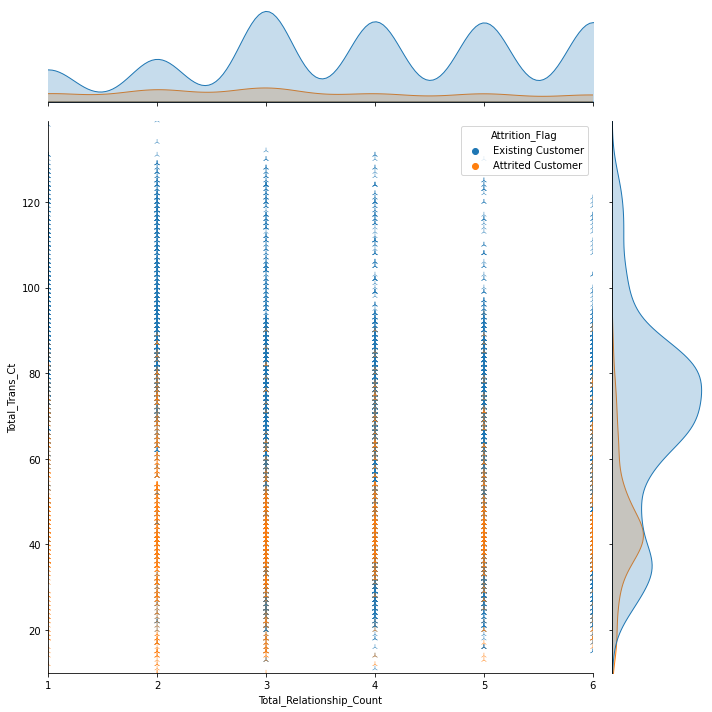

Correlacion  Credit_Limit  y  Total_Trans_Amt  ==>  0.17173015046794077


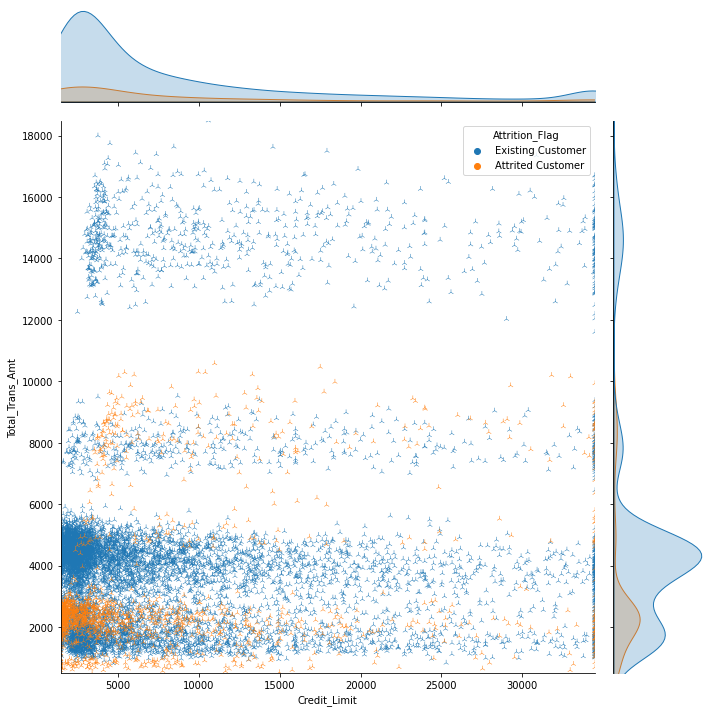

In [ ]:
i = 0
for fil in range(2):
  for col in range(5):
      print(f"Correlacion ",df2.index[i][0]," y ", df2.index[i][1]," ==> ",df2[i])
      sns.jointplot(data=bank_df,
                    x=df2.index[i][0], 
                    y=df2.index[i][1],
                    hue ="Attrition_Flag",
                    kind="scatter",
                    marker = '2',
                    height= 10,
                    ratio = 5,
                    xlim = (bank_df[df2.index[i][0]].min(),bank_df[df2.index[i][0]].max()),
                    ylim = (bank_df[df2.index[i][1]].min(),bank_df[df2.index[i][1]].max())
                    )
      plt.show()
      i = i + 1

Tenemos algunas relaciones lineales mas fuertes entre algunas variables como 

- Credit_Limit / Avg_Open_To_Buy = 0.995981

- Total_Trans_Amt / Total_Trans_Ct = 0.807192

- Customer_Age / Months_on_book = 0.788912

- Total_Revolving_Bal / Avg_Utilization_Ratio = 0.624022

Por otro lado, tenemos otras variables que tienen la siguiente relacion lineal:

- Avg_Open_To_Buy / Avg_Utilization_Ratio = 0.538807

- Credit_Limit / Avg_Utilization_Ratio = 0.482965

La misma NO es muy elevada. Pero observando los graficos anteriores, podemos notar un comportamiento logaritmico. 


# 6-Prueba de modelos

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.ensemble import (RandomForestClassifier, 
                              GradientBoostingClassifier, 
                              GradientBoostingRegressor)

from sklearn.metrics import ( 
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report, 
    roc_auc_score,
    mean_squared_error,
    confusion_matrix)

from sklearn.model_selection import (
    KFold,
    cross_validate,
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV,
    HalvingGridSearchCV,
    StratifiedKFold  
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.experimental import enable_halving_search_cv  # noqa

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

Para empezar a probar modelos y evaluar su desempeño es necesario realizar algunas transformaciones en nuestros datos. Ya que tenemos muchas variables categoricas que no pueden ser analizadas por los modelos.

Debido a esto, se aplicaran tecnicas para codificar estas variables categoricas como puede ser un Label Encoder o dummy


In [ ]:
df_e2 = bank_df
# total de columnas categoricas ['Card_Category','Marital_Status','Income_Category','Education_Level','Gender','Attrition_Flag']
lista = ['Marital_Status','Gender'] # lista de columnas categoricas a codificar con LE
lista2 = ['Card_Category','Income_Category','Education_Level','Attrition_Flag'] # lista de columnas categoricas a codificar con OHE o dummy

labelencoder = LabelEncoder()

for i in lista:
  df_e2[i+'_cat'] = labelencoder.fit_transform(df_e2[i]) # creo una nueva columna con el nombre de la columna categorica anterior + _cat para la codificacion
df_e2 = df_e2.drop(columns=lista) # creo un nuevo df eliminando las columnas categoricas, dejando en su lugar las columnas codificadas

df_e2 = pd.get_dummies(df_e2, columns = lista2)


Le cambio el nombre a la columna Attrition_Flag_Attrited Customer por Target y eliminamos las columnas que no son utiles para el analisis. Por ejemplo la columna Attrition_Flag_Existing Customer que es inversa a nuestro Target.
Por otro lado tambien elminiamos la columna CLIENTNUM que es un ID de cliente que no aporta informacion al modelo. 

In [ ]:
df_e2 = df_e2.rename(columns={'Attrition_Flag_Attrited Customer':'Target'})
df_e2 = df_e2.drop(columns=['Attrition_Flag_Existing Customer','CLIENTNUM'])

In [ ]:
df_e2['Target'].value_counts()
# En este paso, podemos ver que la columna de Target tiene 8500 valores = 0 que son los que corresponden a Existing Customer, y los otros 1627 = 1 corresponden a los Attrited Customer

0    8500
1    1627
Name: Target, dtype: int64

Dividimos nuestros datos en X e y.

In [ ]:
X = df_e2.drop(columns=['Target'])
y = df_e2['Target']    

In [ ]:
#se carga la libreria para poder dividir la información en entrenamiento(es la mayor parte del dataset) y prueba (sobre esto vamos a testear el módelo)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state = 42)

### Prueba 1: AgglomerativeClustering



Prueba de modelo AgglomerativeClustering para cluster

Faltaria hacer un train & test. (recordar armar los conjuntos de train y test por separado). Ver metricas para analizar efectividad del modelo.

La ejecucion con solo 2 columnas demora como 5 minutos si no quitamos el grafico

Sin el grafico, se ejecuta en 2 segundos

In [ ]:

# plt.figure(figsize=(10,6))
# dendrogram = sch.dendrogram(sch.linkage(X_train, method='ward'))
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model.fit(X_train)
y_pred_AC = model.fit_predict(X_test)
# labels = model.labels_
# plt.scatter(X_train[labels==0, 0], X_train[labels==0, 1], s=50, marker='o', color='red')
# plt.scatter(X_train[labels==1, 0], X_train[labels==1, 1], s=50, marker='o', color='blue')
# plt.scatter(X_train[labels==2, 0], X_train[labels==2, 1], s=50, marker='o', color='green')
# plt.scatter(X_train[labels==3, 0], X_train[labels==3, 1], s=50, marker='o', color='purple')
# plt.scatter(X_train[labels==4, 0], X_train[labels==4, 1], s=50, marker='o', color='orange')
# plt.show()

In [ ]:
print('\n\nclassification_report\n\n',classification_report(y_test, y_pred_AC))



classification_report

               precision    recall  f1-score   support

           0       0.84      0.10      0.18      2113
           1       0.17      0.63      0.27       419
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.19      2532
   macro avg       0.20      0.15      0.09      2532
weighted avg       0.73      0.19      0.19      2532



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Prueba 2: Regresion logistica


In [ ]:
model = LogisticRegression(max_iter=800, n_jobs=-1) 
# Ajustar modelo
model.fit(X_train, y_train) 
#Predicciones
predicciones = model.predict(X_test)

In [ ]:
print('accuracy_score\n',accuracy_score(y_test, predicciones))
print('recall_score\n',recall_score(y_test, predicciones))
print('precision_score\n',precision_score(y_test, predicciones))
print('f1_score\n',f1_score(y_test, predicciones))
print('\n\nclassification_report\n\n',classification_report(y_test, predicciones))

accuracy_score
 0.8906003159557662
recall_score
 0.4916467780429594
precision_score
 0.762962962962963
f1_score
 0.5979680696661829


classification_report

               precision    recall  f1-score   support

           0       0.91      0.97      0.94      2113
           1       0.76      0.49      0.60       419

    accuracy                           0.89      2532
   macro avg       0.83      0.73      0.77      2532
weighted avg       0.88      0.89      0.88      2532



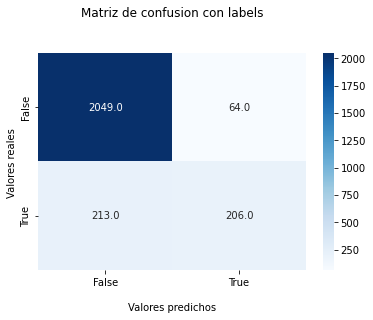

In [ ]:
#Matriz de confusion
cf_matrix = confusion_matrix(y_test, predicciones)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='.1f')
ax.set_title('Matriz de confusion con labels\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
## Ticket labels - En orden alfabetico
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

Haremos una validaion cruzada para determinar si el modelo esta balanceado o no 

In [ ]:
skf = StratifiedKFold(n_splits=5,
                      shuffle=True, 
                      random_state=4)

kfcv_precision =  cross_validate(model,                   # Indicamos el modelo
                                 X_train,                  # Le pasamos los features de entrenamiento 
                                 y_train,                  # Le pasamos la columna target de entrenamiento
                                 scoring='precision',      # Declaramos que metrica deseamos darle seguimiento
                                 return_train_score=True,  # Indicamos que también queremos ver el comportamiento de la metrica en Train 
                                 cv=skf                    # Le pasamos la cantidad de Folds definidos (tambien puede recibir números directamente)           
                                 )

In [ ]:
print(kfcv_precision['train_score'].mean())
print(kfcv_precision['test_score'].mean())

0.732890855445692
0.7373853535411772


En cuanto a la precision el modelo pareceria estar balanceado. Ya que la media de la precision de cada uno de los modelos analizados es muy parecida a la media de la precision de las predicciones. 

In [ ]:
kfcv_recall =  cross_validate(model,                  # Indicamos el modelo
                              X_train,                 # Le pasamos los features de entrenamiento 
                              y_train,                 # Le pasamos la columna target de entrenamiento
                              scoring='recall',        # Declaramos que metrica deseamos darle seguimiento
                              return_train_score=True, # Indicamos que también queremos ver el comportamiento de la metrica en Train 
                              cv=skf                   # Le pasamos la cantidad de Folds definidos (tambien puede recibir números directamente)           
                              )
print(kfcv_recall['train_score'].mean())
print(kfcv_recall['test_score'].mean())

0.5130402666889335
0.504149377593361


Para el recall tambien obtenemos resultados balanceados.

Sin embargo, el modelo ofrece valores un tanto bajos para el recall y presicion de la variable target. Por lo que se procedera a hacer un tuneo de hiperparametros con el fin de ajustar un poco mas el modelo. 

#### Tuneo de hiperparametros

Probamos una penalizacion L1

In [ ]:
l1_values = [0.01, 0.05, 0.1, 0.25, 0.5]
resultados_l1 = []

for valor in l1_values:
    logreg_l1 = LogisticRegression(C=valor, penalty="l1", max_iter = 500, solver = 'liblinear') 

    kfcv_precision =  cross_validate(logreg_l1,              
                                     X_train,
                                     y_train,
                                     scoring='precision',
                                     return_train_score=True,
                                     cv=skf)
    
    resultados_l1.append((valor, kfcv_precision['train_score'].mean(), kfcv_precision['test_score'].mean()))

(pd.DataFrame(resultados_l1, columns= ['valor_penalización', 'train_presicion_mean', 'test_presicion_mean'])
.sort_values(by='test_presicion_mean', ascending = False)
)

,valor_penalización,train_presicion_mean,test_presicion_mean
2,0.10,0.770383,0.770866
3,0.25,0.770333,0.769799
4,0.50,0.766087,0.764564
1,0.05,0.764580,0.760667
0,0.01,0.740983,0.743453


Por lo tanto concluimos que el mejor valor de penalización es 0,1 para mi modelo de test

Probamos una penlaizacion L2

In [ ]:
l2_values = [0.01, 0.05, 0.1, 0.25, 0.5]
resultados_l2 = []

for valor in l2_values:
    logreg_l2 = LogisticRegression(C=valor, penalty="l2", max_iter = 500, solver = 'liblinear') 

    kfcv_precision =  cross_validate(logreg_l2,              
                                     X_train,
                                     y_train,
                                     scoring='precision',
                                     return_train_score=True,
                                     cv=skf)
    
    resultados_l2.append((valor, kfcv_precision['train_score'].mean(), kfcv_precision['test_score'].mean()))

(pd.DataFrame(resultados_l2, columns= ['valor_penalización', 'train_presicion_mean', 'test_presicion_mean'])
.sort_values(by='test_presicion_mean', ascending = False)
)

,valor_penalización,train_presicion_mean,test_presicion_mean
4,0.50,0.745018,0.746369
0,0.01,0.747644,0.746000
1,0.05,0.740043,0.745640
2,0.10,0.737400,0.741243
3,0.25,0.736654,0.738938


La mejor penalizacion para el modelo evaluandolo segun su precision seria L1 con un valor de 0.1 

Evaluamos ambos modelos a travez de un classification_report

In [ ]:
logreg_l1 = LogisticRegression(C=0.1, penalty="l1", max_iter = 500, solver = 'liblinear')
logreg_l2 = LogisticRegression(C=0.01, penalty="l2", max_iter = 500, solver = 'liblinear')
logreg_l1.fit(X_train, y_train)
logreg_l2.fit(X_train, y_train)
y_pred_l1 = logreg_l1.predict(X_test)
y_pred_l2 = logreg_l2.predict(X_test)

In [ ]:
#CREAMOS REPORTES L1
print(classification_report(y_test, y_pred_l1))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2113
           1       0.77      0.53      0.63       419

    accuracy                           0.90      2532
   macro avg       0.84      0.75      0.78      2532
weighted avg       0.89      0.90      0.89      2532



In [ ]:
#CREAMOS REPORTES L2
print(classification_report(y_test, y_pred_l2))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2113
           1       0.73      0.43      0.54       419

    accuracy                           0.88      2532
   macro avg       0.81      0.70      0.74      2532
weighted avg       0.87      0.88      0.87      2532



-Desde el punto de vista del recall el L1(0,53) es mejor que el L2(0,43)

-Desde el punto de vista de precisión el L1(0,77) es mejor que el L2(0,73)

**Por lo que utilizaremos una penalizacion L1 con un valor de 0.1**

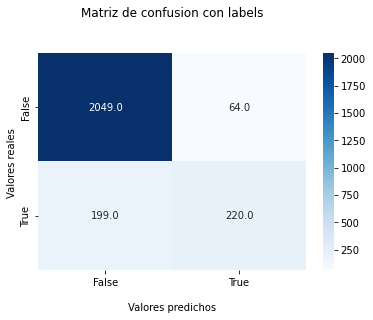

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred_l1)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='.1f')
ax.set_title('Matriz de confusion con labels\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

#### Optimizacion de hiperparametros 

In [ ]:
# # instanciamos un gbm
gbm = GradientBoostingClassifier(random_state=0)
lr = LogisticRegression(random_state=0,solver = 'liblinear')

In [ ]:
# Creamos el espacio de hiperparametros
param_grid = dict(
    n_estimators=stats.randint(50, 150),
    min_samples_split=stats.uniform(.1, .7),
    max_depth=stats.randint(2, 15)
    )
param_grid_2 = dict(
    C=stats.randint(100,1000),
    penalty=("l1","l2"), 
    max_iter = stats.randint(50,500)
    )

In [ ]:
# Create el objeto RandomizedSearchCV
rand_gbm_search = RandomizedSearchCV(gbm,
                                     param_grid,
                                     scoring='precision',
                                     cv=3,
                                     n_iter = 40, # Con este argumento indicamos cuantas muestras queremos que sean tomadas (arriba de 40 es un bune numero)
                                     random_state=10,
                                     n_jobs=-1,
                                     refit=True)

In [ ]:
# Create el objeto RandomizedSearchCV
rand_lr_search = RandomizedSearchCV(lr,
                                    param_grid_2,
                                    scoring='precision',
                                    cv=3,
                                    n_iter = 40, # Con este argumento indicamos cuantas muestras queremos que sean tomadas (arriba de 40 es un bune numero)
                                    random_state=10,
                                    n_jobs=-1,
                                    return_train_score = True,
                                    refit=True)

In [ ]:
%%time
rand_gbm_search.fit(X_train, y_train)

CPU times: user 3.85 s, sys: 194 ms, total: 4.05 s
Wall time: 2min 22s


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f0725d0fb20>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f0725784340>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f0725420820>},
                   random_state=10, scoring='precision')

In [ ]:
%%time
rand_lr_search.fit(X_train, y_train)

CPU times: user 518 ms, sys: 60.9 ms, total: 579 ms
Wall time: 7.77 s


RandomizedSearchCV(cv=3,
                   estimator=LogisticRegression(random_state=0,
                                                solver='liblinear'),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f071edf2e20>,
                                        'max_iter': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f07250ac100>,
                                        'penalty': ('l1', 'l2')},
                   random_state=10, return_train_score=True,
                   scoring='precision')

In [ ]:
# Usamos random_rf para generar predicciones
y_pred = rand_gbm_search.predict(X_test)

In [ ]:
# Usamos random_rf para generar predicciones
y_pred_2 = rand_lr_search.predict(X_test)

In [ ]:
pd.DataFrame(rand_lr_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.128455,0.008153,0.005601,0.000254,365,175,l1,"{'C': 365, 'max_iter': 175, 'penalty': 'l1'}",0.754777,0.764286,0.772308,0.763790,0.007165,1,0.770627,0.768489,0.759289,0.766135,0.004919
1,0.085033,0.008416,0.005808,0.000299,627,370,l2,"{'C': 627, 'max_iter': 370, 'penalty': 'l2'}",0.742857,0.757692,0.703583,0.734711,0.022829,35,0.740608,0.735294,0.751371,0.742424,0.006688
2,0.085540,0.005837,0.005642,0.000100,223,206,l2,"{'C': 223, 'max_iter': 206, 'penalty': 'l2'}",0.761538,0.757692,0.703583,0.740938,0.026461,26,0.733456,0.735294,0.750000,0.739583,0.007404
3,0.095157,0.007916,0.006851,0.002279,833,463,l2,"{'C': 833, 'max_iter': 463, 'penalty': 'l2'}",0.742958,0.754789,0.703583,0.733777,0.021890,39,0.735915,0.735294,0.750000,0.740403,0.006791
4,0.133052,0.010965,0.006951,0.000955,108,123,l1,"{'C': 108, 'max_iter': 123, 'penalty': 'l1'}",0.752381,0.764286,0.773006,0.763224,0.008454,6,0.770248,0.768860,0.759289,0.766132,0.004872
5,0.127718,0.011781,0.006261,0.000175,590,90,l1,"{'C': 590, 'max_iter': 90, 'penalty': 'l1'}",0.754777,0.764286,0.772308,0.763790,0.007165,1,0.770627,0.768489,0.759289,0.766135,0.004919
6,0.128723,0.005865,0.006357,0.000078,520,421,l1,"{'C': 520, 'max_iter': 421, 'penalty': 'l1'}",0.754777,0.764286,0.772308,0.763790,0.007165,1,0.770627,0.768489,0.759289,0.766135,0.004919
7,0.093884,0.018263,0.008828,0.001731,456,289,l2,"{'C': 456, 'max_iter': 289, 'penalty': 'l2'}",0.769784,0.757692,0.703583,0.743687,0.028784,22,0.761468,0.735294,0.751371,0.749378,0.010778
8,0.090733,0.008232,0.006340,0.000122,154,394,l2,"{'C': 154, 'max_iter': 394, 'penalty': 'l2'}",0.758621,0.753846,0.708197,0.740221,0.022728,28,0.733945,0.736568,0.754098,0.741537,0.008946
9,0.101569,0.015695,0.010719,0.006375,222,112,l2,"{'C': 222, 'max_iter': 112, 'penalty': 'l2'}",0.745520,0.750929,0.703583,0.733344,0.021160,40,0.737968,0.770690,0.750000,0.752886,0.013514


In [ ]:
print(classification_report(y_test, y_pred))
print('-'*30)
print(roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2113
           1       0.93      0.78      0.85       419

    accuracy                           0.95      2532
   macro avg       0.94      0.88      0.91      2532
weighted avg       0.95      0.95      0.95      2532

------------------------------
0.8845356679358488


In [ ]:
print(classification_report(y_test, y_pred_2))
print('-'*30)
print(roc_auc_score(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2113
           1       0.77      0.56      0.65       419

    accuracy                           0.90      2532
   macro avg       0.84      0.76      0.79      2532
weighted avg       0.89      0.90      0.89      2532

------------------------------
0.7624355196324153


In [ ]:
print(rand_gbm_search.best_params_)

{'max_depth': 14, 'min_samples_split': 0.6997952117204131, 'n_estimators': 121}


In [ ]:
print(rand_lr_search.best_params_)

{'C': 365, 'max_iter': 175, 'penalty': 'l1'}


### Prueba 3: KNN

Se aplica modelo KNN sobre los datos anteriores

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9) # Instanciamos el clasificador k veces es decir k vecinos cercanos
knn.fit(X_train, y_train)
predicciones_knn = knn.predict(X_test)
print(accuracy_score(y_test, predicciones_knn))

0.8811216429699842


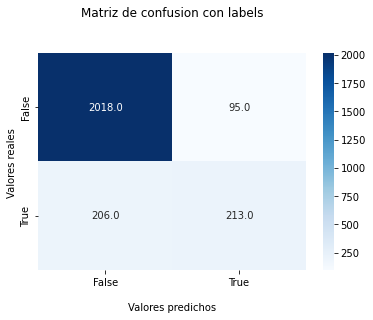

In [ ]:
#Matriz de confusion
cf_matrix = confusion_matrix(y_test, predicciones_knn)
ax = sns.heatmap(cf_matrix, annot=True,cmap='Blues',fmt='.1f')
ax.set_title('Matriz de confusion con labels\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
## Ticket labels - En orden alfabetico
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [ ]:
print('accuracy_score\n',accuracy_score(y_test, predicciones))
print('recall_score\n',recall_score(y_test, predicciones))
print('precision_score\n',precision_score(y_test, predicciones))
print('f1_score\n',f1_score(y_test, predicciones))
print('\n\nclassification_report\n\n',classification_report(y_test, predicciones))

accuracy_score
 0.8906003159557662
recall_score
 0.4916467780429594
precision_score
 0.762962962962963
f1_score
 0.5979680696661829


classification_report

               precision    recall  f1-score   support

           0       0.91      0.97      0.94      2113
           1       0.76      0.49      0.60       419

    accuracy                           0.89      2532
   macro avg       0.83      0.73      0.77      2532
weighted avg       0.88      0.89      0.88      2532



### Prueba4: RandomForestClassifier

Info consultada para usar RandomForestClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingRandomSearchCV.html#sklearn.model_selection.HalvingRandomSearchCV

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingGridSearchCV.html#sklearn.model_selection.HalvingGridSearchCV

In [ ]:
clf = RandomForestClassifier(n_estimators = 100,
                             max_depth=5, 
                             random_state=0,
                             criterion = 'gini')
clf.fit(X_train, y_train)
y_pred_RFC = clf.predict(X_test)

In [ ]:
print('accuracy_score\n',accuracy_score(y_test, y_pred_RFC))
print('recall_score\n',recall_score(y_test, y_pred_RFC))
print('precision_score\n',precision_score(y_test, y_pred_RFC))
print('f1_score\n',f1_score(y_test, y_pred_RFC))

accuracy_score
 0.9036334913112164
recall_score
 0.45584725536992843
precision_score
 0.9227053140096618
f1_score
 0.610223642172524


Las metricas observadas son bastante buenas comparadas con la regresion logistica. Se procedera a hacer una validacion cruzada para corroborar el ajuste del modelo

In [ ]:
skf = StratifiedKFold(n_splits=5,
                      shuffle=True, 
                      random_state=4)

kfcv_precision =  cross_validate(clf,                   # Indicamos el modelo
                                 X_train,                  # Le pasamos los features de entrenamiento 
                                 y_train,                  # Le pasamos la columna target de entrenamiento
                                 scoring='precision',      # Declaramos que metrica deseamos darle seguimiento
                                 return_train_score=True,  # Indicamos que también queremos ver el comportamiento de la metrica en Train 
                                 cv=skf                    # Le pasamos la cantidad de Folds definidos (tambien puede recibir números directamente)           
                                 )

print(kfcv_precision['train_score'].mean())
print(kfcv_precision['test_score'].mean())

0.9202755102570819
0.8849056514531795


In [ ]:
skf = StratifiedKFold(n_splits=5,
                      shuffle=True, 
                      random_state=4)

kfcv_precision =  cross_validate(clf,                   # Indicamos el modelo
                                 X_train,                  # Le pasamos los features de entrenamiento 
                                 y_train,                  # Le pasamos la columna target de entrenamiento
                                 scoring='recall',      # Declaramos que metrica deseamos darle seguimiento
                                 return_train_score=True,  # Indicamos que también queremos ver el comportamiento de la metrica en Train 
                                 cv=skf                    # Le pasamos la cantidad de Folds definidos (tambien puede recibir números directamente)           
                                 )

print(kfcv_precision['train_score'].mean())
print(kfcv_precision['test_score'].mean())

0.5575335983950704
0.5148760330578511


#### Tuneo de hiperparametros

Leyendo la bibliografica de sklearn encontramos diferentes metodos para encontrar los mejores hiperparametos para un modelo RandomForestClasifier

**HalvingGridSearchCV**

Este metodo es intensivo en recursos, Lo que hace en el caso planteado a continuacion es hacer una validacion cruzada, probando con todos los parametros ubicados en la param_grid. min_samples_split 5 o 10 y max_depth 3, 10 o 20.

Ademas el valor que modificara para intentar maximizar el scoring seleccionado sera el n_estimators, cuyo valor maximo podria llegar a 800 segun se establecio en max_resources.

In [ ]:
clf = RandomForestClassifier(random_state=0,
                             criterion = 'gini')

param_grid = {"min_samples_split": [5, 10],
              'max_depth':[3,10,20]}
search = HalvingGridSearchCV(clf, param_grid, 
                             resource='n_estimators',  # Este es el recurso que modificara para maximizar el scoring del modelo 
                             max_resources=800,      # Este es el valor maximo que puede tomar este recurso
                             random_state=0,
                             cv = 3,                # Usa CrossValidation con (Stratified)KFold
                             scoring = 'precision').fit(X_train, y_train)
search.best_params_ 

{'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 798}

el resultado arrojado fue el siguiente

{'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 798} 

Es decir que tomo el valor maximo en max_depth, tomo el minimo en min_samples_split y escogio un valor de n_estimators = 798.

Estos valores los cargaremos en nuestro nuevo modelo de RFC para observar los resultados.


In [ ]:
clf_2 = RandomForestClassifier(n_estimators = 798,
                             max_depth=20 , 
                             random_state=0,
                             min_samples_split = 5,
                             criterion = 'gini')
clf_2.fit(X_train, y_train)
y_pred_RFC_2 = clf_2.predict(X_test)

In [ ]:
print('accuracy_score new       accuracy_score old\n',accuracy_score(y_test, y_pred_RFC_2) ,'    ', accuracy_score(y_test, y_pred_RFC))
print('recall_score new         recall_score old\n',recall_score(y_test, y_pred_RFC_2),'    ',recall_score(y_test, y_pred_RFC))
print('precision_score new      precision_score old\n',precision_score(y_test, y_pred_RFC_2),'    ',precision_score(y_test, y_pred_RFC))
print('f1_score new             f1_score old\n',f1_score(y_test, y_pred_RFC_2),'    ',f1_score(y_test, y_pred_RFC))

accuracy_score new       accuracy_score old
 0.9518167456556083      0.9036334913112164
recall_score new         recall_score old
 0.7589498806682577      0.45584725536992843
precision_score new      precision_score old
 0.9380530973451328      0.9227053140096618
f1_score new             f1_score old
 0.8390501319261213      0.610223642172524


Como podemos observar todas las metricas mejoran notablemente en el modelo ajustado. 

Por lo que se tomara como base para hacer un analisis los siguientes hiperparametros 

n_estimators = 798,
                             max_depth=20 , 
                             random_state=0,
                             min_samples_split = 5,
                             criterion = 'gini'

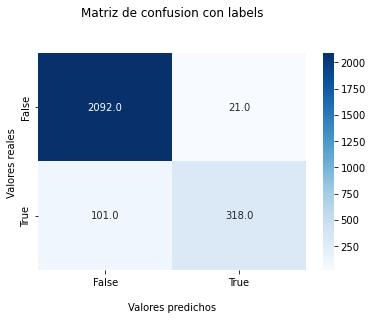

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred_RFC_2)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='.1f')
ax.set_title('Matriz de confusion con labels\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

### Comparacion de los mejores modelos

Comparamos las metricas de los dos mejores modelos analizados. LogisticRegression y RandomForestClassifier

In [ ]:
print(' RandomForestClassifier    LogisticRegression\n')
print('accuracy_score RFC         accuracy_score LR\n',accuracy_score(y_test, y_pred_RFC_2) ,'      ', accuracy_score(y_test, y_pred_l1))
print('recall_score RFC           recall_score LR\n',recall_score(y_test, y_pred_RFC_2),'      ',recall_score(y_test, y_pred_l1))
print('precision_score RFC        precision_score LR\n',precision_score(y_test, y_pred_RFC_2),'      ',precision_score(y_test, y_pred_l1))
print('f1_score RFC               f1_score LR\n',f1_score(y_test, y_pred_RFC_2),'      ',f1_score(y_test, y_pred_l1))

 RandomForestClassifier    LogisticRegression

accuracy_score RFC         accuracy_score LR
 0.9518167456556083        0.8961295418641391
recall_score RFC           recall_score LR
 0.7589498806682577        0.5250596658711217
precision_score RFC        precision_score LR
 0.9380530973451328        0.7746478873239436
f1_score RFC               f1_score LR
 0.8390501319261213        0.6258890469416785


Comparamos las dos matrices de confusion de los dos mejores modelos analizados. LogisticRegression y RandomForestClassifier

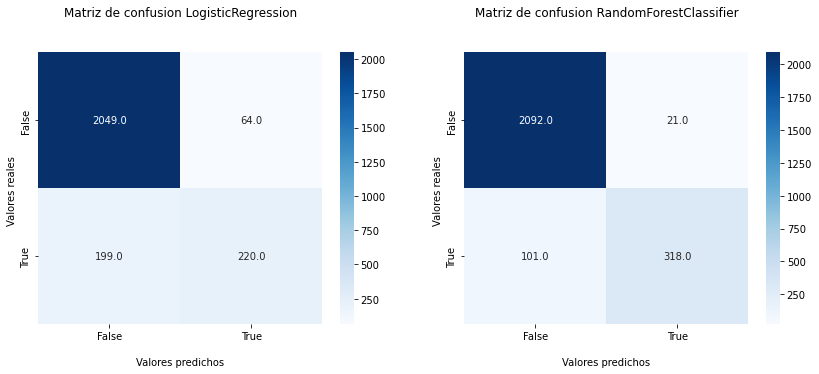

In [ ]:
f, axes = plt.subplots(1, 2,figsize=(14, 5))
cf_matrix = confusion_matrix(y_test, y_pred_l1)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='.1f',ax=axes[0])
ax.set_title('Matriz de confusion LogisticRegression\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

cf_matrix = confusion_matrix(y_test, y_pred_RFC_2)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='.1f',ax=axes[1])
ax.set_title('Matriz de confusion RandomForestClassifier\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

Como conclusion, seleccionaremos el modelo de RandomForestClassifier ajustando los hiperparametros como se establece en dicho modelo. 

Esto arrojo los mejores resultados en todas las metricas.